In [ ]:
'''
So take top 10 companies by sector instead of all 8800 thousand
(DONE)

:
(pre-processing) do on all data before 2020 Do all reproducing from lecturers after cleaning check for correlations (Bar chart all this):
            Simple linear regression (DONE)
            Multi linear regressions (DONE)
            logistic Regression (Sergei Did this so copy sergei code) (DONE)
            Missing values see if there is any missing values still (DONE)
            Outlier detection (3 std deviation) (DONE)
            Data Transformation (We already did data normalisation), 
                                    we need to do discretisation (DONE)
            Feature Enginnering we need to remove inflation adjsuted clsoign prices (already done)

When you split the data make sure you split from 2008 to 2020 is training data, then 2020 - now is training data
top 10 comapnies per sector right now
(DONE)
'''

In [ ]:
'''
Energy,XOM,CVX,COP,WMB,EPD,MPC,ET,MPLX,PSX,VLO
Materials,LIN,SCCO,SHW,ECL,CRH,FCX,APD,CTVA,AU,VMC
Industrial,GE,CAT,RTX,GEV,BA,UNP,ETN,DE,HON,LMT
Consumer discretionary,AMZN,TSLA,BABA,HD,TM,MCD,PDD,TJX,BKNG,LOW
Consumer staples,WMT,COST,PG,KO,PM,PEP,UL,BTI,BUD,MO
Health care,LLy,JNJ,ABBV,UNH,MRK,ABT,ISRG,AMGN,DHR,GILD
Financials,JPM,V,BAC,GS MS,WFC,C,AXP,RY
Information technology,AAPL,MSFT,GOOG,AVGO,TSMC,ORCL,PLTR,AMD,CSCO,MU
Communication,GOOG,META,NFLX,TMUS,DIS,APP,T,VZ,SPOT,CMCSA
Utilities,CEG,SO,DUK,AEP,VST,SRE,D,XEL,EXC,ETR
Real estate,PLD,AMT,EQIX,SPG,DLR,O,PSA,CBRE,CCI,VTR
'''

In [66]:
import glob, os, pandas as pd, numpy as np, statsmodels.api as sm
from statsmodels.tools.sm_exceptions import PerfectSeparationError
import matplotlib.pyplot as plt

clean_dir = "/home/ug/orlovsd2/csc1171/data/clean/SP500_ETF_FX_Crypto_Daily"
files = glob.glob(f"{clean_dir}/*_cleaned_2008_2020.csv")
freqs = [("W","W-FRI"), ("M","ME"), ("Y","YE-DEC")]

Allowed files: {'ABBV.csv', 'AMGN.csv', 'NFLX.csv', 'LOW.csv', 'LMT.csv', 'TSMC.csv', 'CRH.csv', 'AMZN.csv', 'UNH.csv', 'CCI.csv', 'DE.csv', 'ET.csv', 'TJX.csv', 'SPOT.csv', 'GEV.csv', 'ISRG.csv', 'GE.csv', 'DHR.csv', 'VST.csv', 'WMB.csv', 'RTX.csv', 'C.csv', 'DUK.csv', 'ETR.csv', 'HD.csv', 'BUD.csv', 'BAC.csv', 'SCCO.csv', 'MPC.csv', 'PSA.csv', 'APD.csv', 'CMCSA.csv', 'APP.csv', 'VMC.csv', 'V.csv', 'GOOG.csv', 'WFC.csv', 'BABA.csv', 'SPG.csv', 'COP.csv', 'SO.csv', 'PEP.csv', 'MO.csv', 'ABT.csv', 'AEP.csv', 'RY.csv', 'AMD.csv', 'DLR.csv', 'VTR.csv', 'JPM.csv', 'META.csv', 'BTI.csv', 'WMT.csv', 'KO.csv', 'EXC.csv', 'CSCO.csv', 'AAPL.csv', 'COST.csv', 'BKNG.csv', 'O.csv', 'VLO.csv', 'CVX.csv', 'TMUS.csv', 'MS.csv', 'AXP.csv', 'GILD.csv', 'PSX.csv', 'MU.csv', 'AVGO.csv', 'TM.csv', 'AMT.csv', 'PLTR.csv', 'LIN.csv', 'JNJ.csv', 'ETN.csv', 'VZ.csv', 'XEL.csv', 'GS.csv', 'CEG.csv', 'MSFT.csv', 'SRE.csv', 'ORCL.csv', 'MPLX.csv', 'CBRE.csv', 'TSLA.csv', 'XOM.csv', 'CAT.csv', 'FCX.csv', 'PDD.csv'

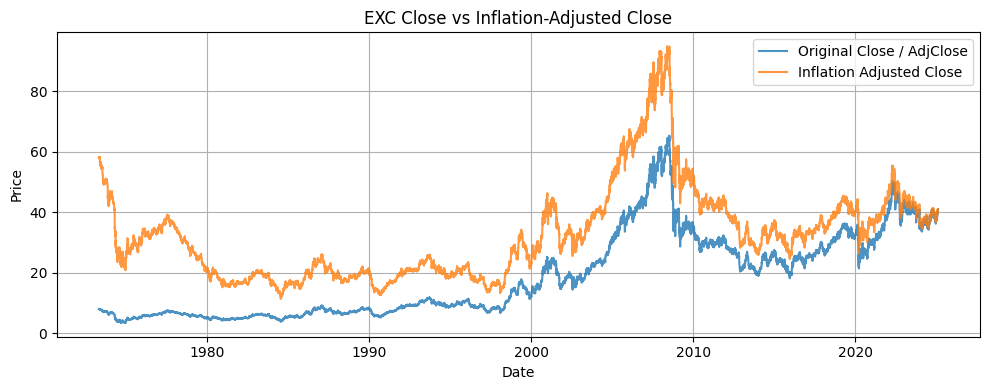

Summary for NFLX:
                 first_date                 last_date  num_rows  num_missing  \
0 2002-05-23 00:00:00+00:00 2025-02-05 00:00:00+00:00      5714            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


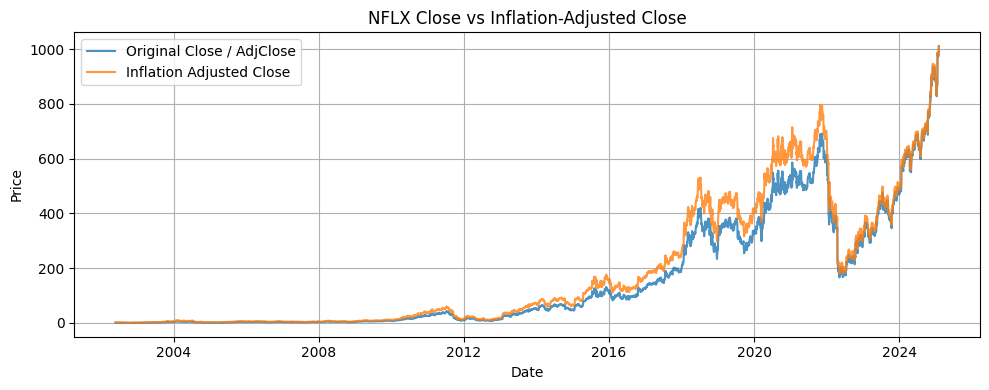

Summary for CMCSA:
                 first_date                 last_date  num_rows  num_missing  \
0 1980-03-17 00:00:00+00:00 2025-02-05 00:00:00+00:00     11316            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


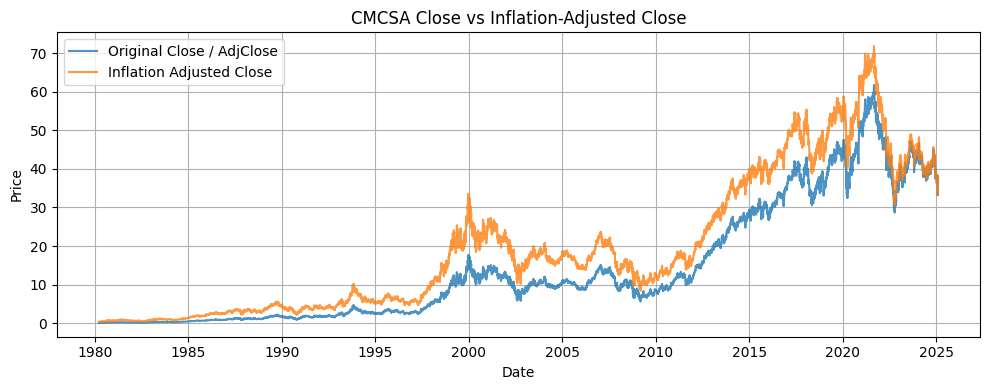

Summary for JNJ:
                 first_date                 last_date  num_rows  num_missing  \
0 1962-01-02 00:00:00+00:00 2025-02-05 00:00:00+00:00     15881            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


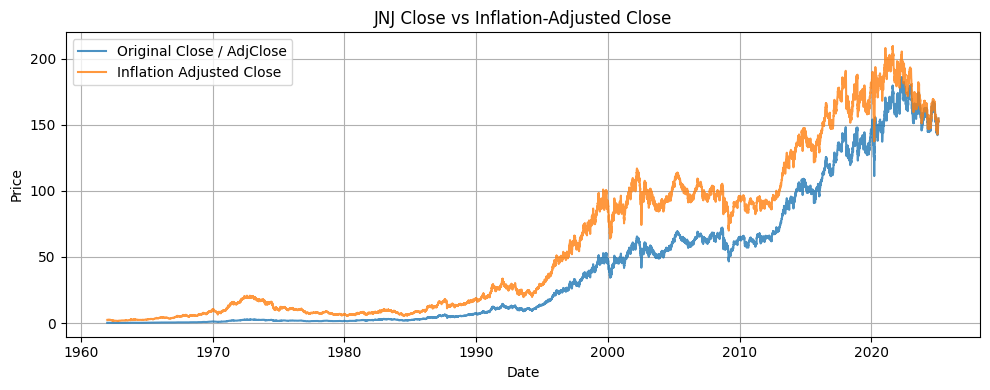

Summary for VLO:
                 first_date                 last_date  num_rows  num_missing  \
0 1982-01-04 00:00:00+00:00 2025-02-05 00:00:00+00:00     10862            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


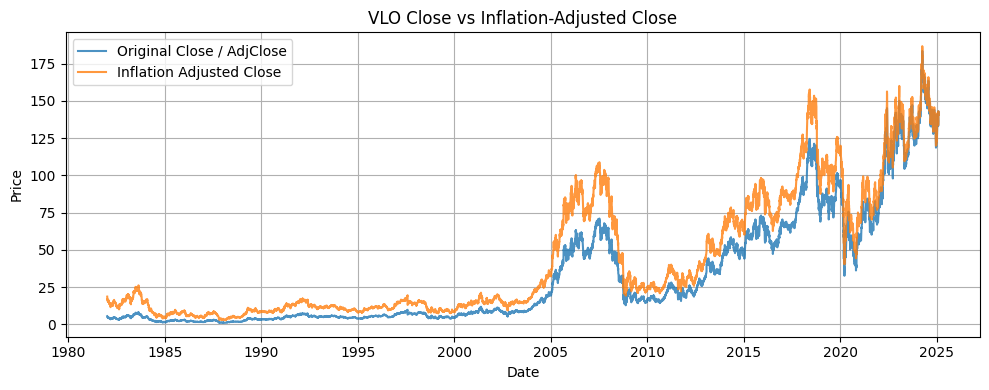

Summary for PDD:
                 first_date                 last_date  num_rows  num_missing  \
0 2018-07-26 00:00:00+00:00 2025-02-05 00:00:00+00:00      1642            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


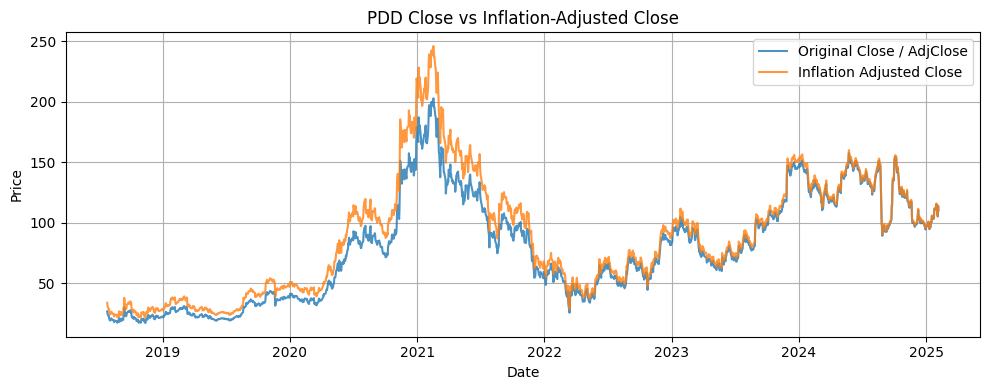

Summary for UNH:
                 first_date                 last_date  num_rows  num_missing  \
0 1984-10-17 00:00:00+00:00 2025-02-05 00:00:00+00:00     10155            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


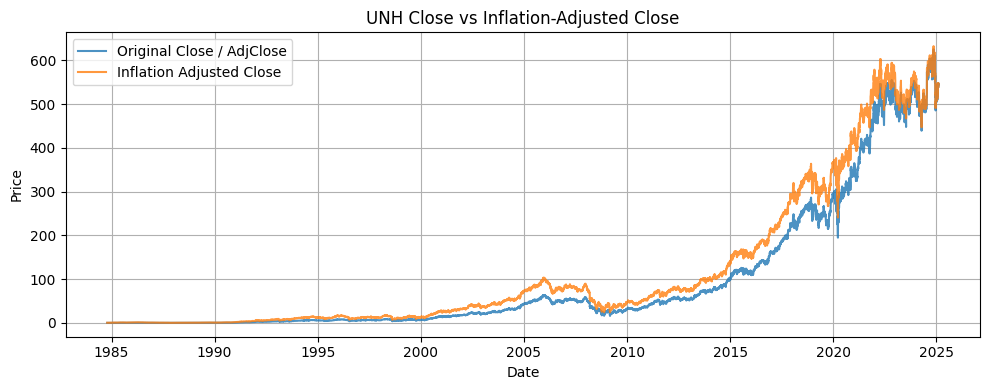

Summary for MU:
                 first_date                 last_date  num_rows  num_missing  \
0 1984-06-01 00:00:00+00:00 2025-02-05 00:00:00+00:00     10251            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


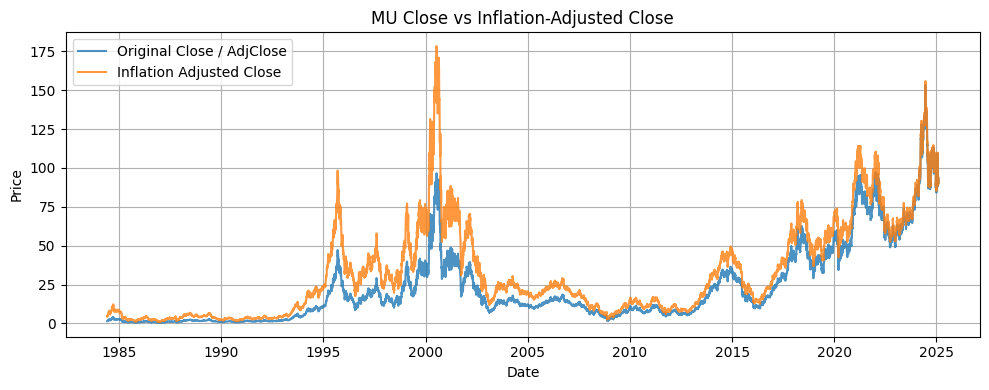

Summary for PLTR:
                 first_date                 last_date  num_rows  num_missing  \
0 2020-09-30 00:00:00+00:00 2025-02-05 00:00:00+00:00      1093            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


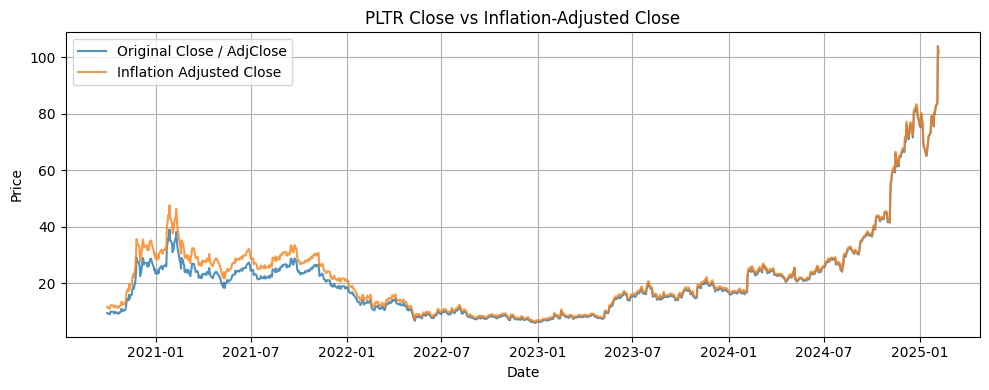

Summary for EQIX:
                 first_date                 last_date  num_rows  num_missing  \
0 2000-08-11 00:00:00+00:00 2025-02-05 00:00:00+00:00      6158            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


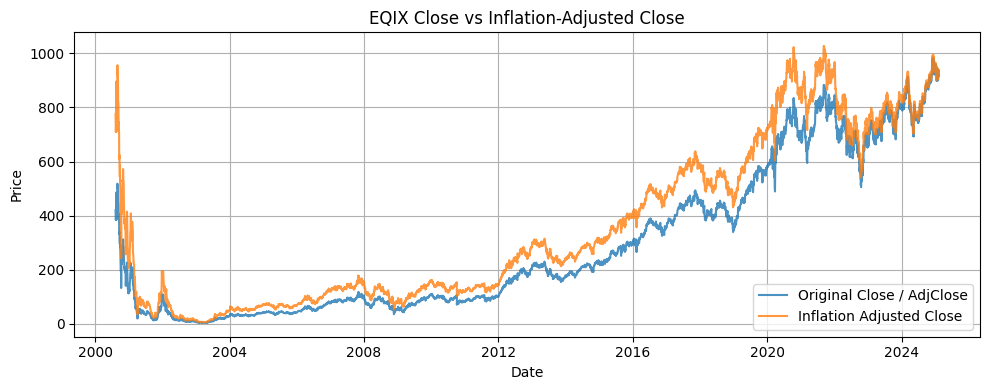

Summary for GS:
                 first_date                 last_date  num_rows  num_missing  \
0 1999-05-04 00:00:00+00:00 2025-02-05 00:00:00+00:00      6481            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


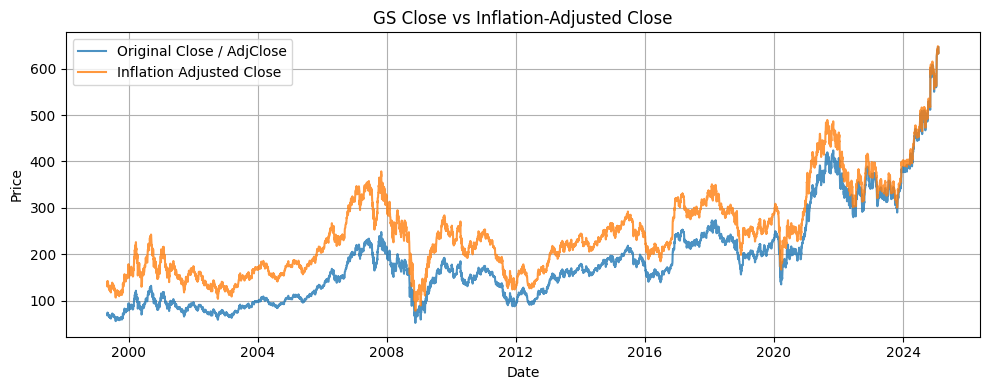

Summary for HON:
                 first_date                 last_date  num_rows  num_missing  \
0 1962-01-02 00:00:00+00:00 2025-02-05 00:00:00+00:00     15881            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


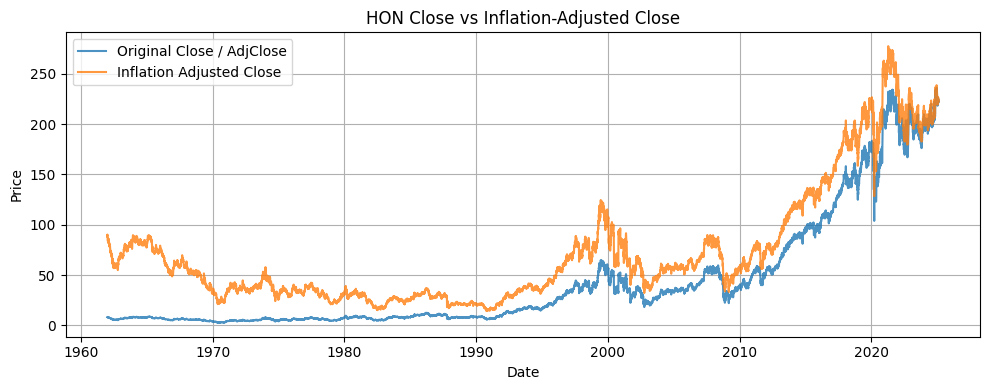

Summary for ECL:
                 first_date                 last_date  num_rows  num_missing  \
0 1973-02-21 00:00:00+00:00 2025-02-05 00:00:00+00:00     13102            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


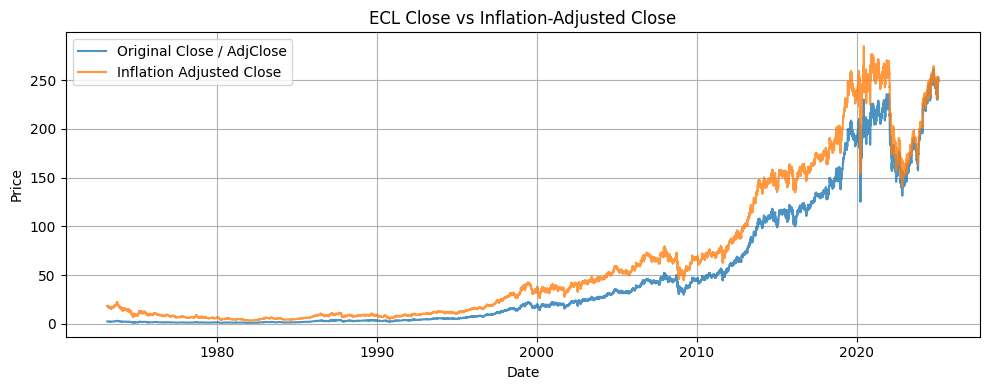

Summary for AEP:
                 first_date                 last_date  num_rows  num_missing  \
0 1962-01-02 00:00:00+00:00 2025-02-05 00:00:00+00:00     15881            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


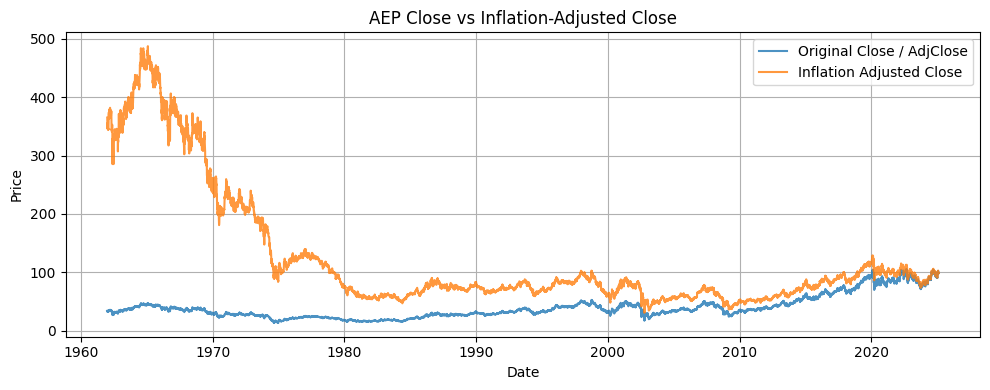

Summary for PLD:
                 first_date                 last_date  num_rows  num_missing  \
0 1997-11-21 00:00:00+00:00 2025-02-05 00:00:00+00:00      6843            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


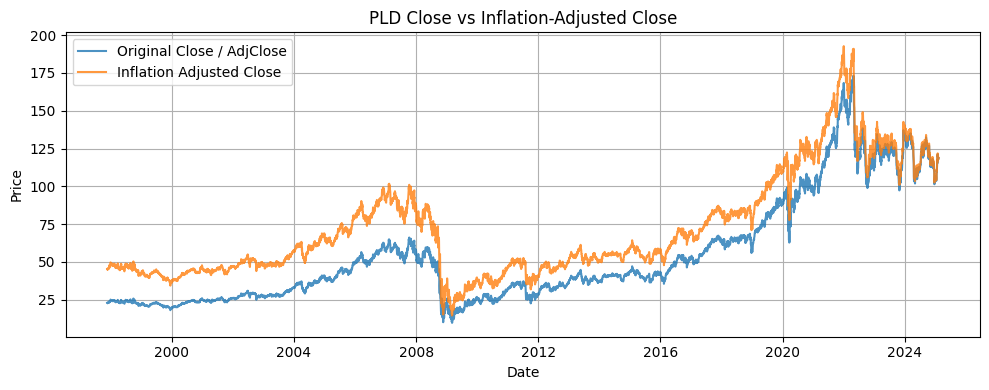

Summary for BAC:
                 first_date                 last_date  num_rows  num_missing  \
0 1973-02-21 00:00:00+00:00 2025-02-05 00:00:00+00:00     13102            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


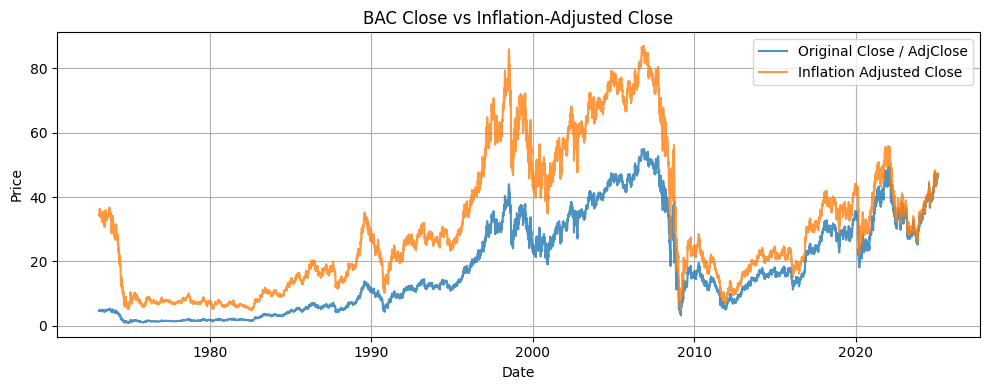

Summary for MSFT:
                 first_date                 last_date  num_rows  num_missing  \
0 1986-03-13 00:00:00+00:00 2025-02-05 00:00:00+00:00      9802            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


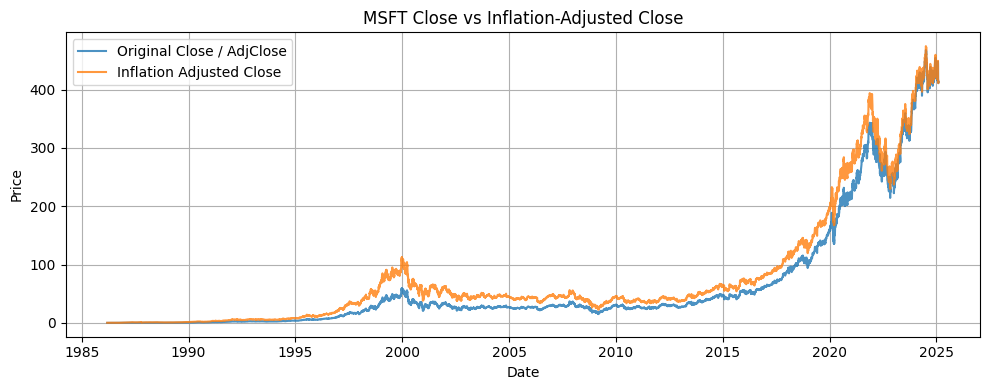

Summary for RTX:
                 first_date                 last_date  num_rows  num_missing  \
0 1962-04-02 00:00:00+00:00 2025-02-05 00:00:00+00:00     15818            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


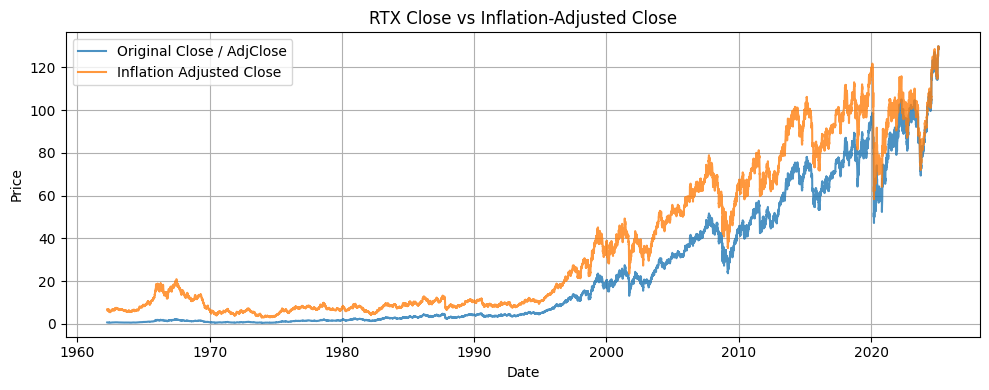

Summary for ETN:
                 first_date                 last_date  num_rows  num_missing  \
0 1972-06-01 00:00:00+00:00 2025-02-05 00:00:00+00:00     13282            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


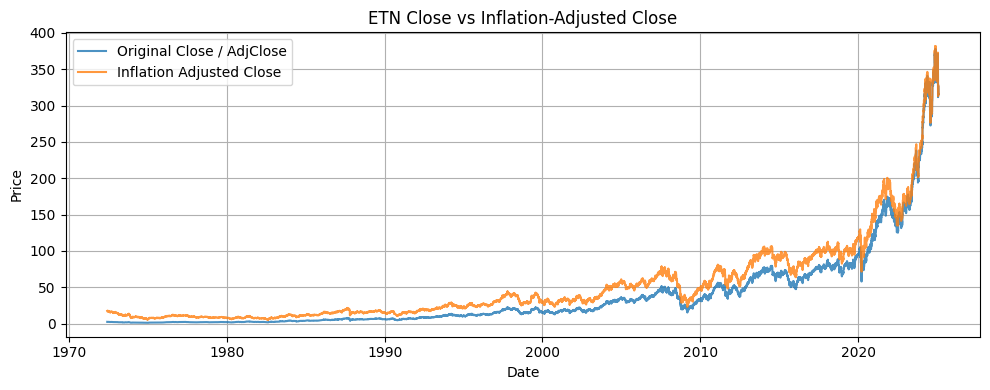

Summary for AXP:
                 first_date                 last_date  num_rows  num_missing  \
0 1972-06-01 00:00:00+00:00 2025-02-05 00:00:00+00:00     13282            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


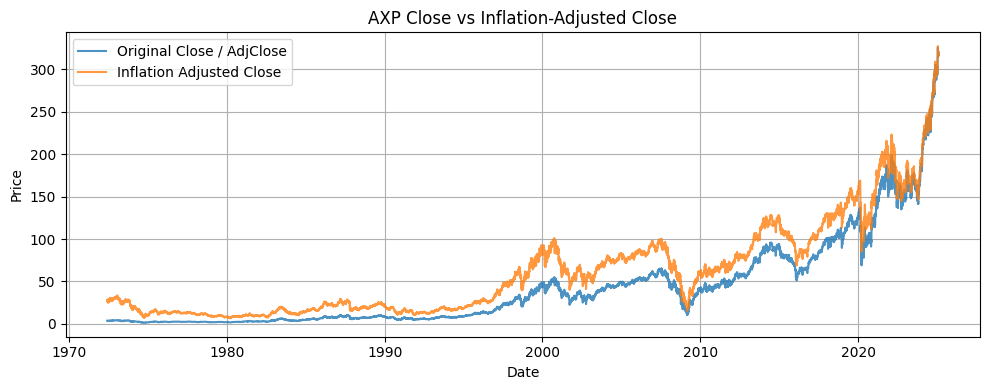

Summary for ABT:
                 first_date                 last_date  num_rows  num_missing  \
0 1980-03-17 00:00:00+00:00 2025-02-05 00:00:00+00:00     11316            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


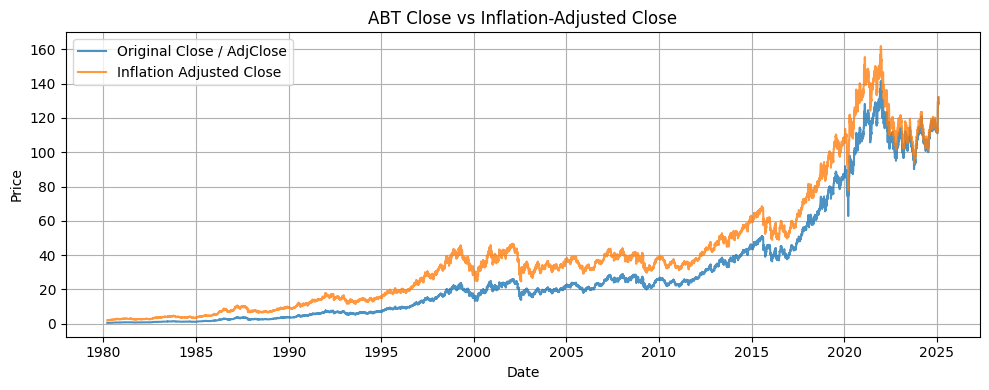

Summary for AAPL:
                 first_date                 last_date  num_rows  num_missing  \
0 1980-12-12 00:00:00+00:00 2025-02-05 00:00:00+00:00     11128            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


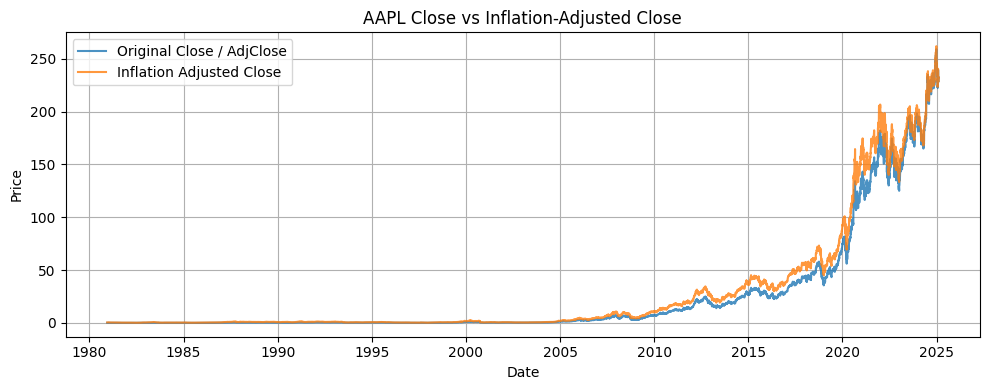

Summary for AMD:
                 first_date                 last_date  num_rows  num_missing  \
0 1980-03-17 00:00:00+00:00 2025-02-05 00:00:00+00:00     11316            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


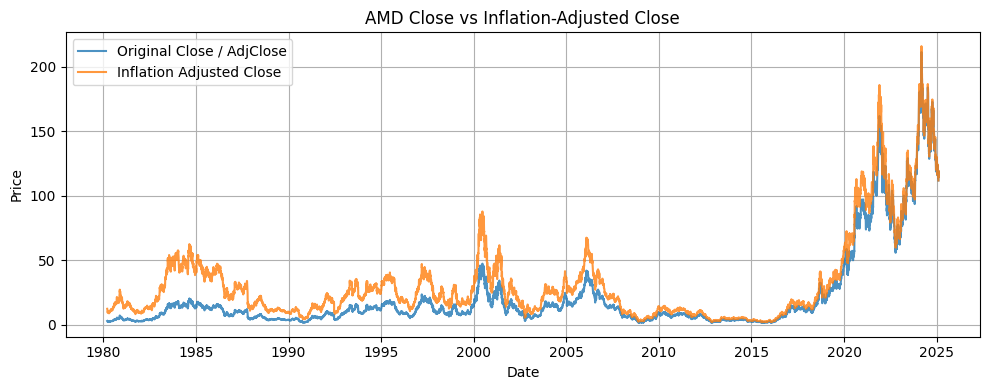

Summary for DLR:
                 first_date                 last_date  num_rows  num_missing  \
0 2004-10-29 00:00:00+00:00 2025-02-05 00:00:00+00:00      5100            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


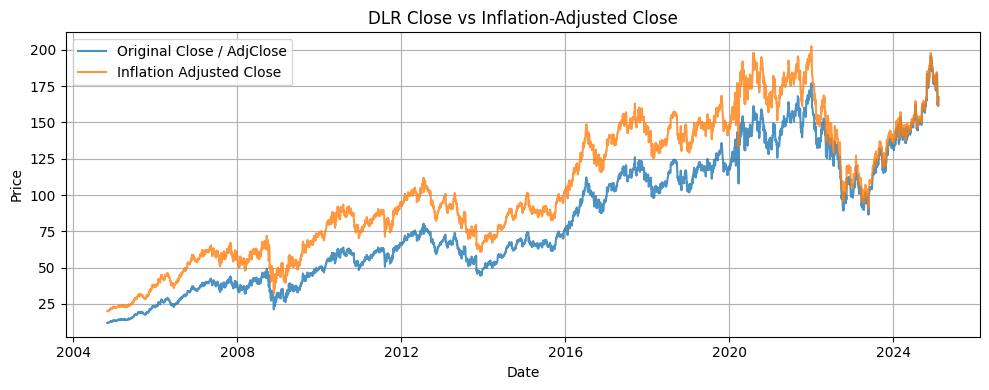

Summary for APD:
                 first_date                 last_date  num_rows  num_missing  \
0 1980-03-17 00:00:00+00:00 2025-02-05 00:00:00+00:00     11316            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


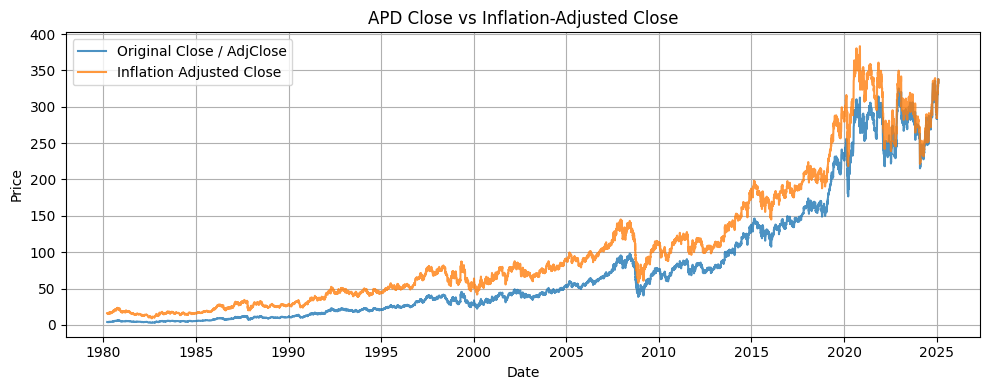

Summary for GOOG:
                 first_date                 last_date  num_rows  num_missing  \
0 2004-08-19 00:00:00+00:00 2025-02-05 00:00:00+00:00      5150            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


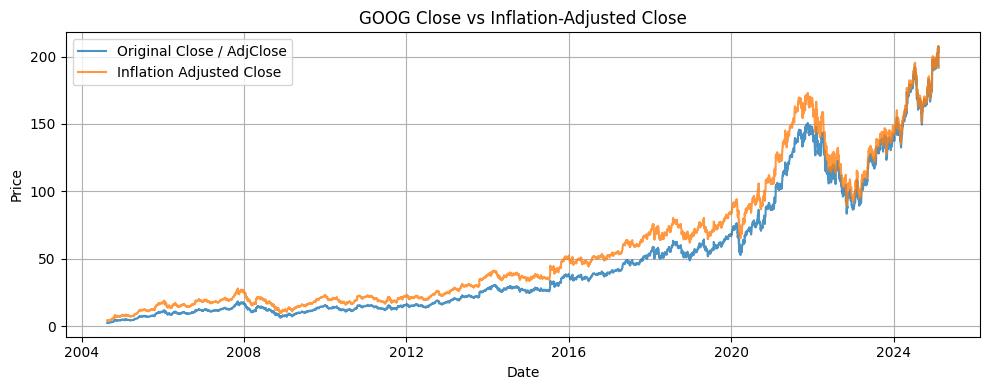

Summary for MS:
                 first_date                 last_date  num_rows  num_missing  \
0 1993-02-23 00:00:00+00:00 2025-02-05 00:00:00+00:00      8045            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


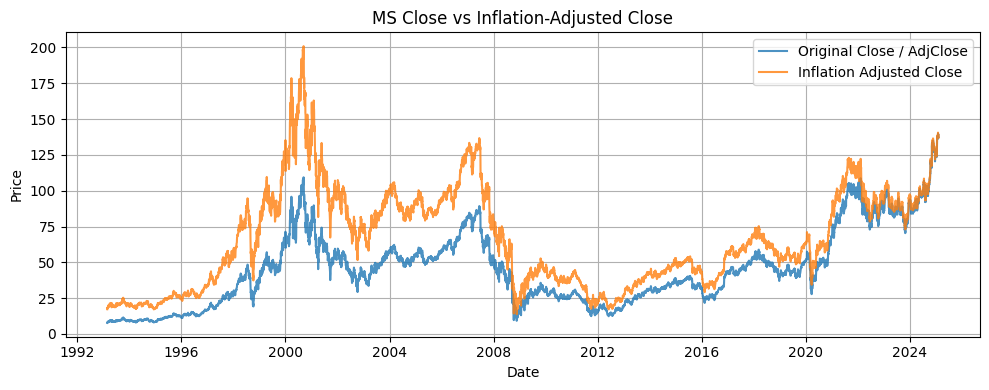

Summary for CSCO:
                 first_date                 last_date  num_rows  num_missing  \
0 1990-02-16 00:00:00+00:00 2025-02-05 00:00:00+00:00      8807            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


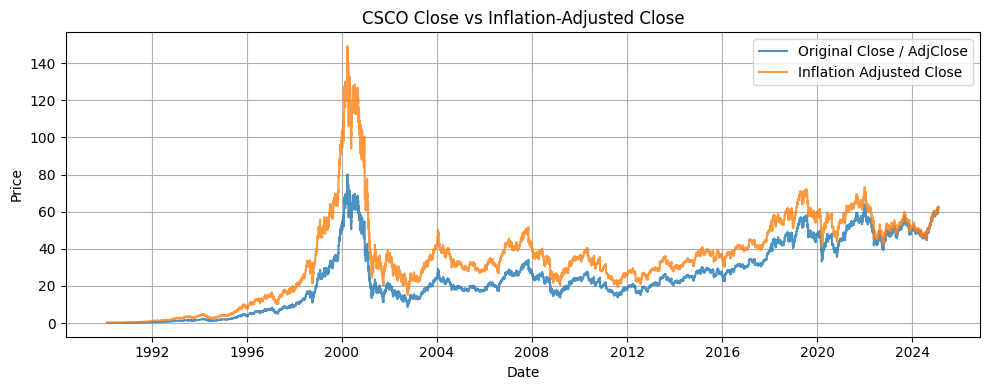

Summary for VST:
                 first_date                 last_date  num_rows  num_missing  \
0 2016-10-05 00:00:00+00:00 2025-02-05 00:00:00+00:00      2096            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


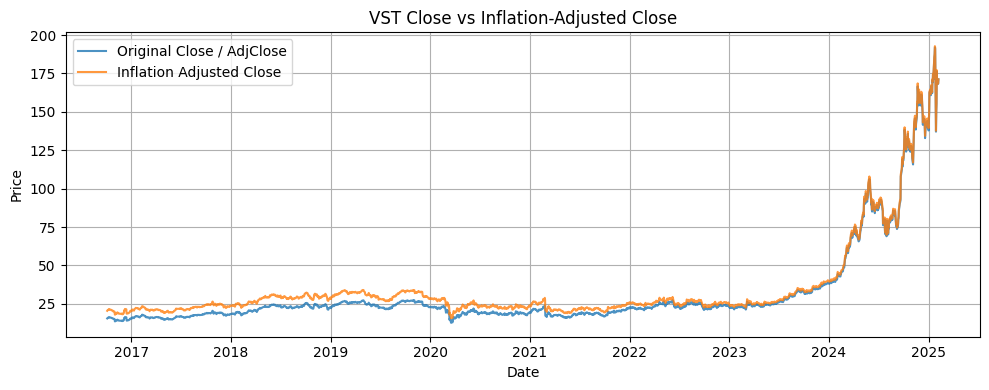

Summary for MPC:
                 first_date                 last_date  num_rows  num_missing  \
0 2011-06-24 00:00:00+00:00 2025-02-05 00:00:00+00:00      3425            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


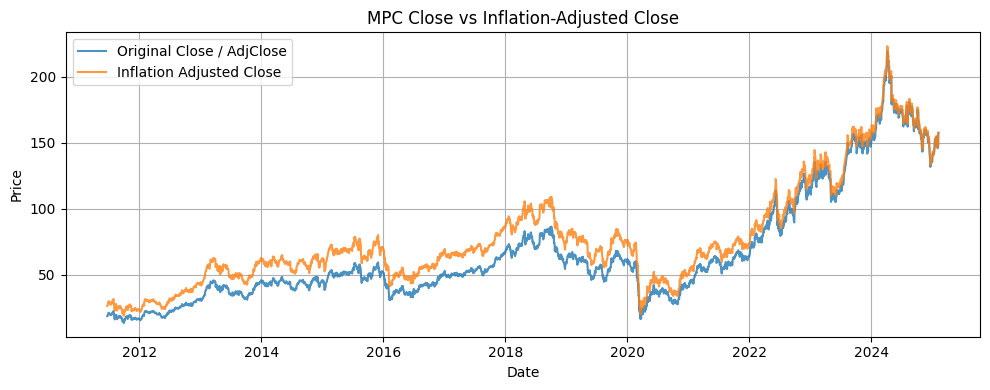

Summary for MO:
                 first_date                 last_date  num_rows  num_missing  \
0 1962-01-02 00:00:00+00:00 2025-02-05 00:00:00+00:00     15881            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


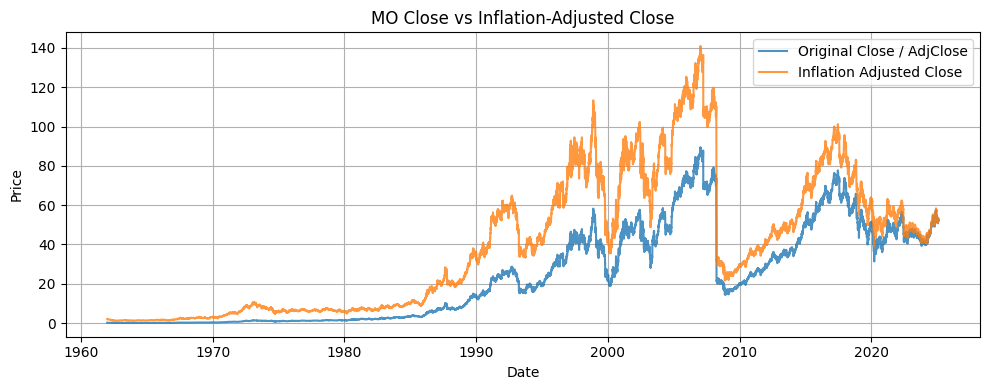

Summary for GEV:
                 first_date                 last_date  num_rows  num_missing  \
0 2024-04-01 00:00:00+00:00 2025-02-05 00:00:00+00:00       214            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


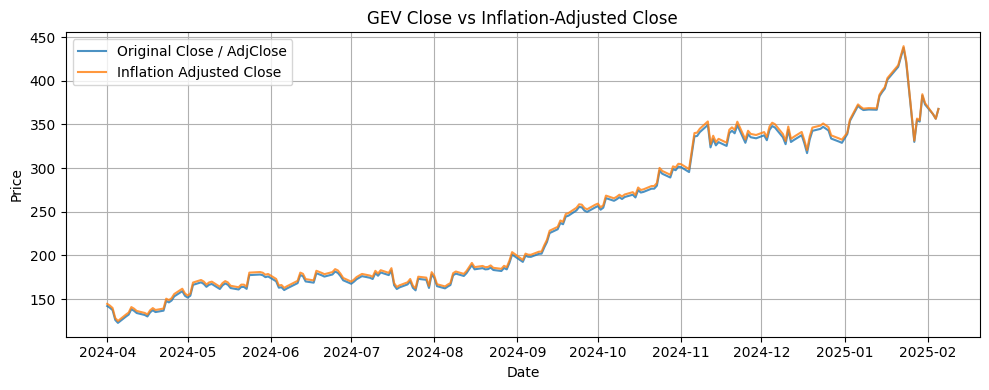

Summary for AMT:
                 first_date                 last_date  num_rows  num_missing  \
0 1998-02-27 00:00:00+00:00 2025-02-05 00:00:00+00:00      6778            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


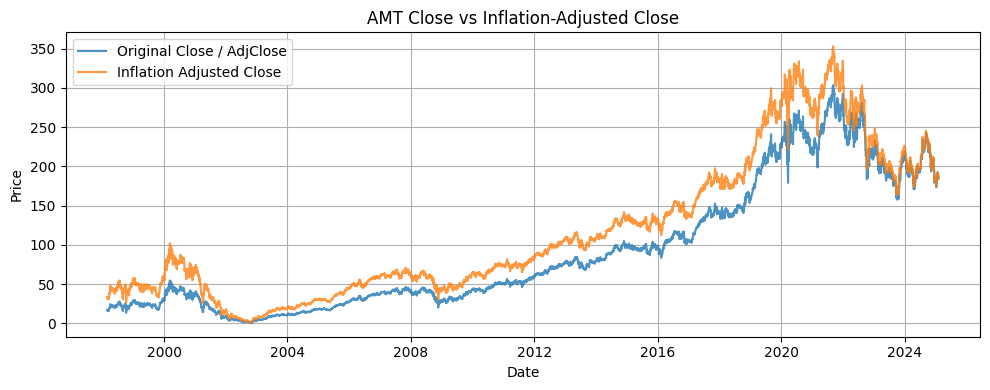

Summary for MCD:
                 first_date                 last_date  num_rows  num_missing  \
0 1966-07-05 00:00:00+00:00 2025-02-05 00:00:00+00:00     14746            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


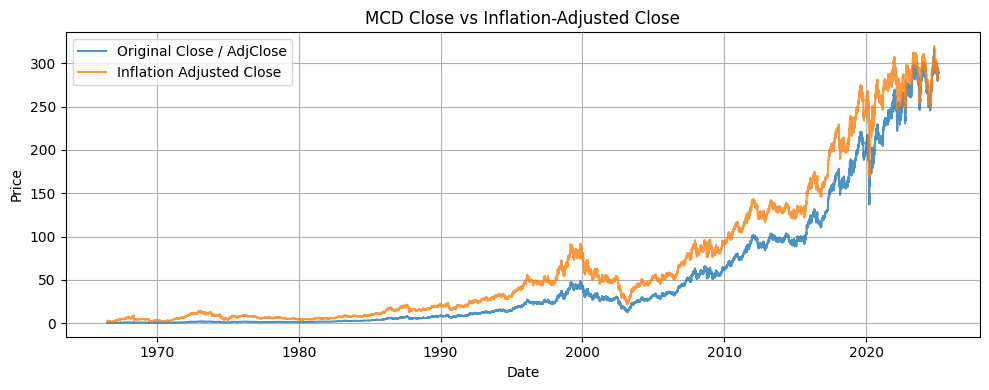

Summary for WMT:
                 first_date                 last_date  num_rows  num_missing  \
0 1972-08-25 00:00:00+00:00 2025-02-05 00:00:00+00:00     13222            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


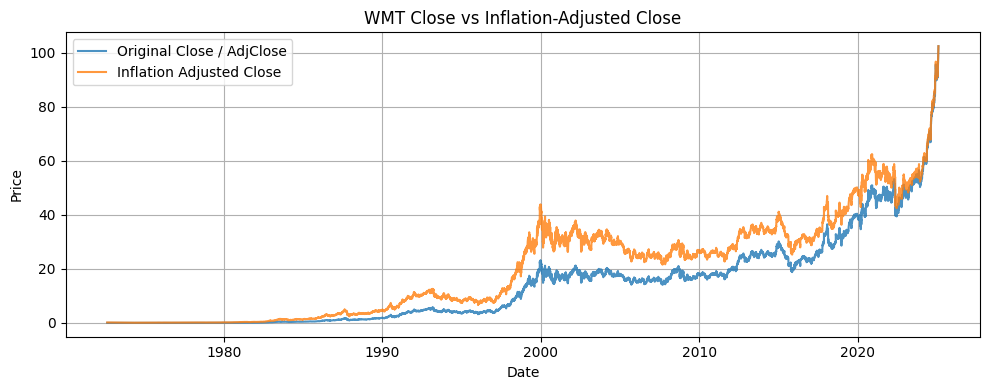

Summary for PM:
                 first_date                 last_date  num_rows  num_missing  \
0 2008-03-17 00:00:00+00:00 2025-02-04 00:00:00+00:00      4250            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


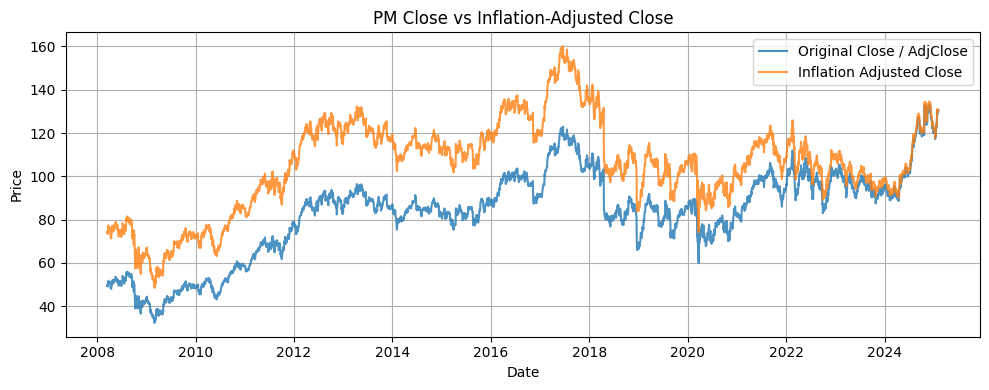

Summary for VZ:
                 first_date                 last_date  num_rows  num_missing  \
0 1983-11-21 00:00:00+00:00 2025-02-05 00:00:00+00:00     10384            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


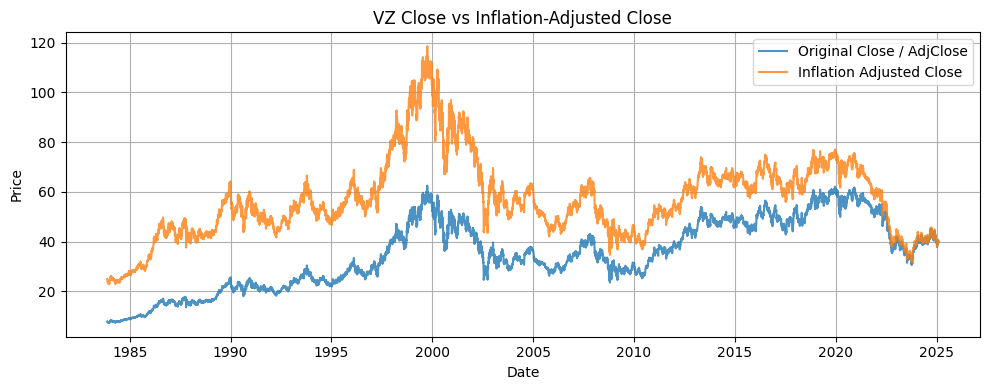

Summary for COP:
                 first_date                 last_date  num_rows  num_missing  \
0 1981-12-31 00:00:00+00:00 2025-02-05 00:00:00+00:00     10863            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


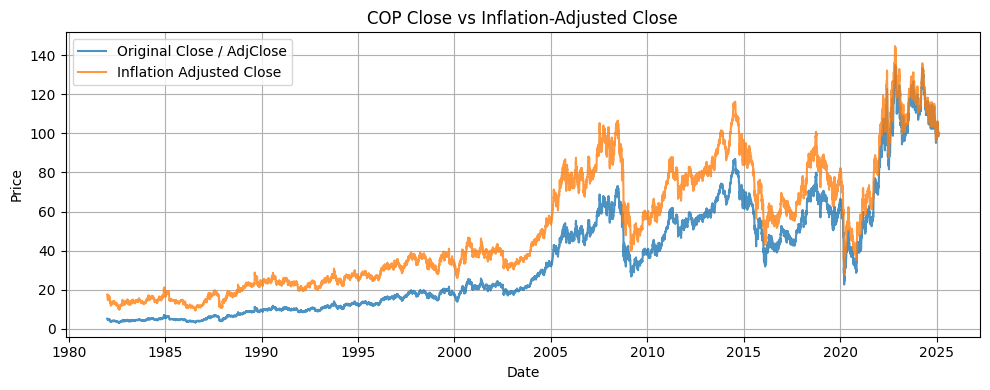

Summary for GILD:
                 first_date                 last_date  num_rows  num_missing  \
0 1992-01-22 00:00:00+00:00 2025-02-05 00:00:00+00:00      8320            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


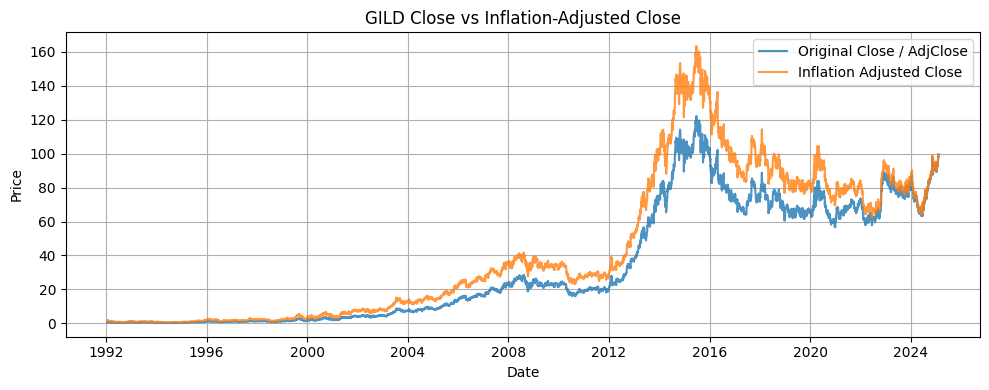

Summary for LOW:
                 first_date                 last_date  num_rows  num_missing  \
0 1980-03-17 00:00:00+00:00 2025-02-05 00:00:00+00:00     11316            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


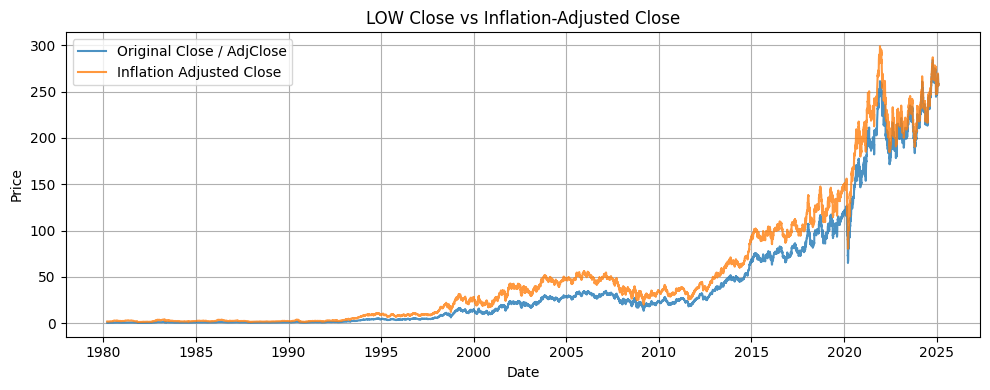

Summary for GE:
                 first_date                 last_date  num_rows  num_missing  \
0 1962-01-02 00:00:00+00:00 2025-02-05 00:00:00+00:00     15881            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


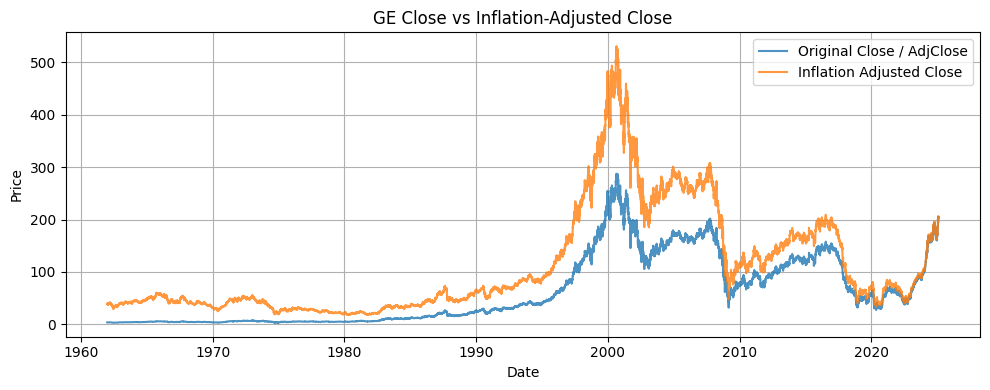

Summary for V:
                 first_date                 last_date  num_rows  num_missing  \
0 2008-03-19 00:00:00+00:00 2025-02-05 00:00:00+00:00      4249            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


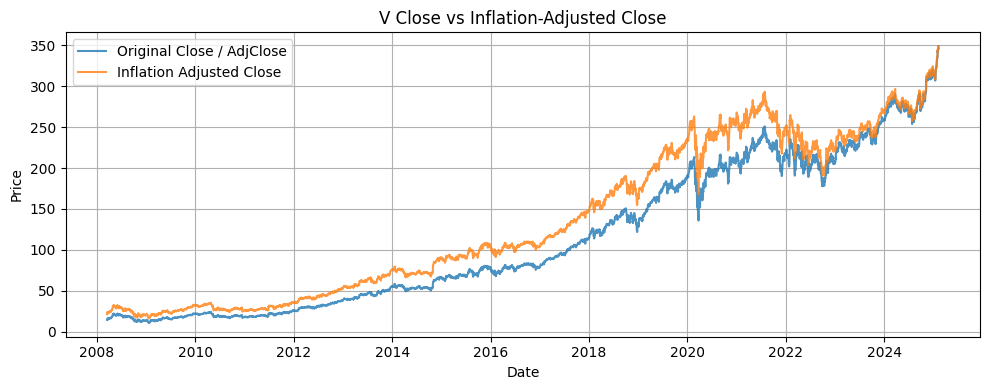

Summary for CEG:
                 first_date                 last_date  num_rows  num_missing  \
0 2022-01-19 00:00:00+00:00 2025-02-05 00:00:00+00:00       765            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


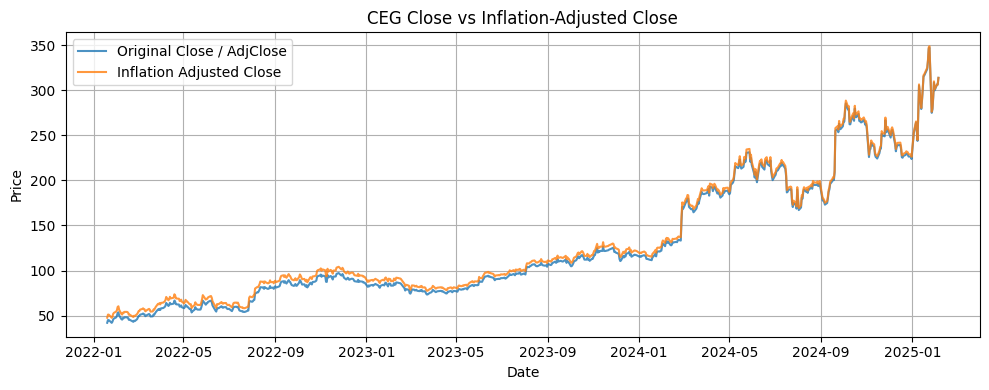

Summary for KO:
                 first_date                 last_date  num_rows  num_missing  \
0 1962-01-02 00:00:00+00:00 2025-02-05 00:00:00+00:00     15881            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


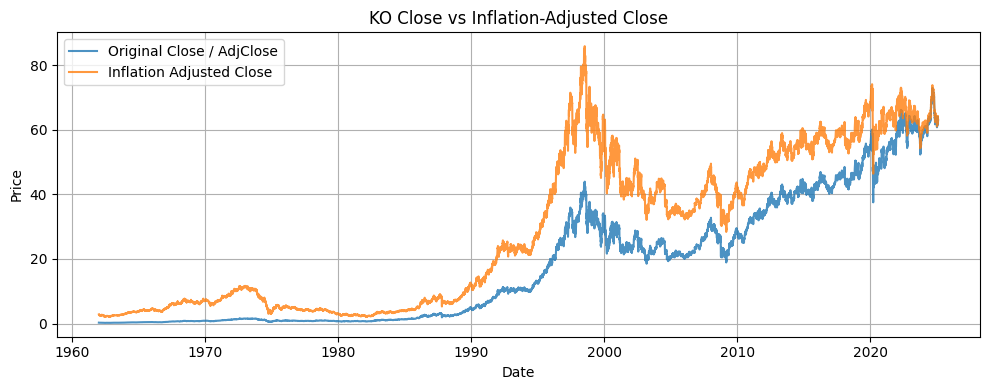

Summary for AMZN:
                 first_date                 last_date  num_rows  num_missing  \
0 1997-05-15 00:00:00+00:00 2025-02-05 00:00:00+00:00      6976            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


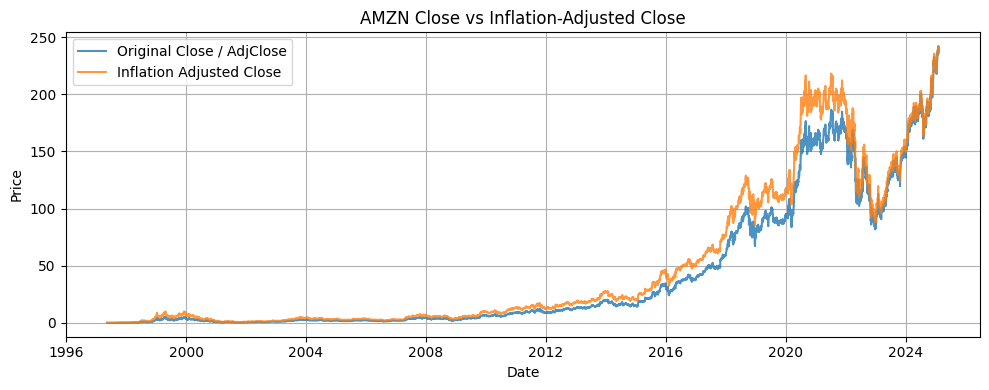

Summary for WFC:
                 first_date                 last_date  num_rows  num_missing  \
0 1972-06-01 00:00:00+00:00 2025-02-05 00:00:00+00:00     13282            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


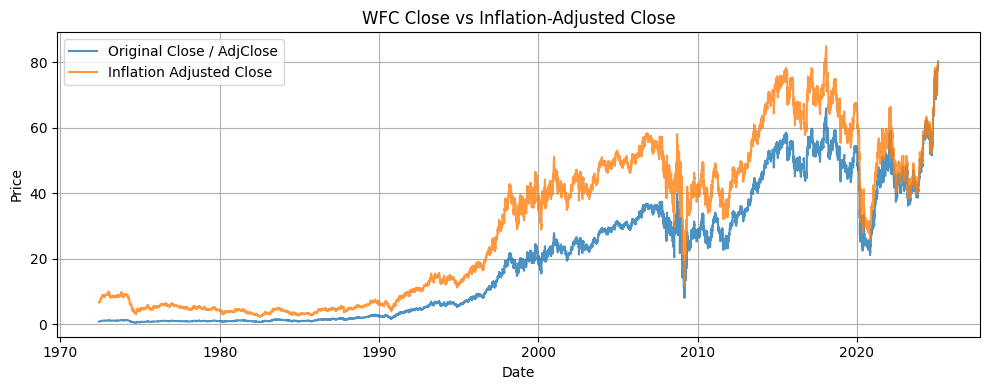

Summary for JPM:
                 first_date                 last_date  num_rows  num_missing  \
0 1980-03-17 00:00:00+00:00 2025-02-05 00:00:00+00:00     11316            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


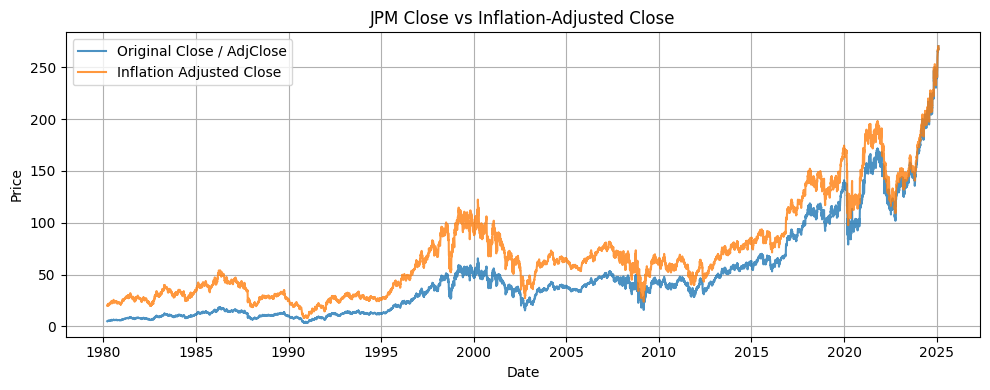

Summary for CCI:
                 first_date                 last_date  num_rows  num_missing  \
0 1998-08-18 00:00:00+00:00 2025-02-05 00:00:00+00:00      6659            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


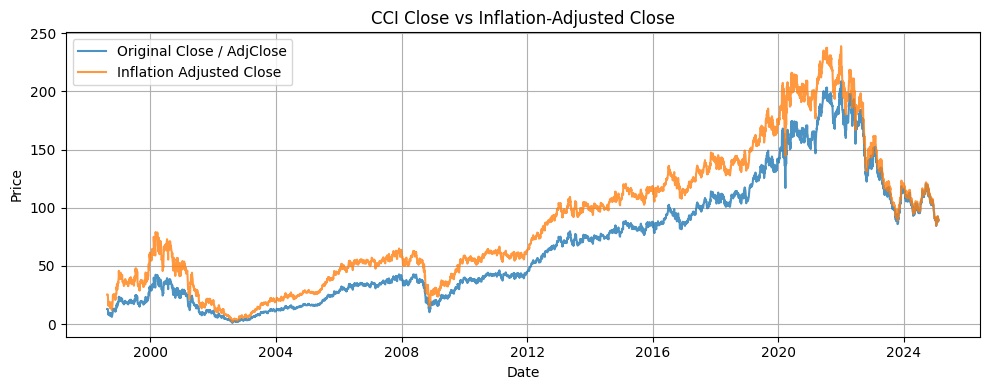

Summary for DE:
                 first_date                 last_date  num_rows  num_missing  \
0 1972-06-01 00:00:00+00:00 2025-02-05 00:00:00+00:00     13282            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


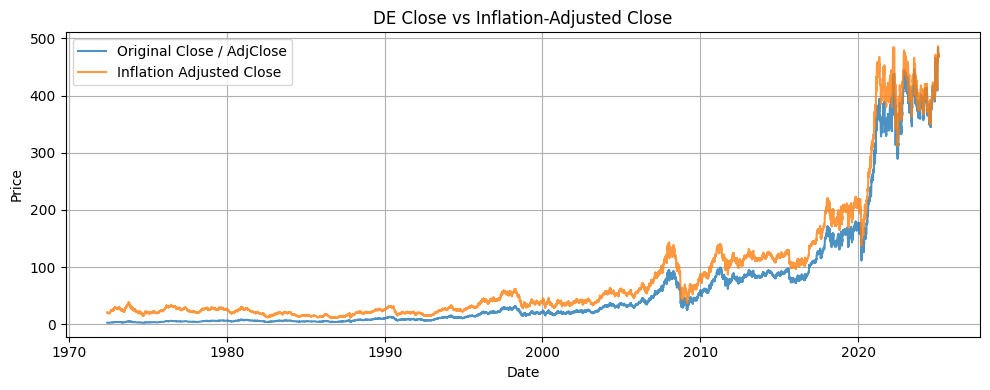

Summary for LLY:
                 first_date                 last_date  num_rows  num_missing  \
0 1972-06-01 00:00:00+00:00 2025-02-05 00:00:00+00:00     13282            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


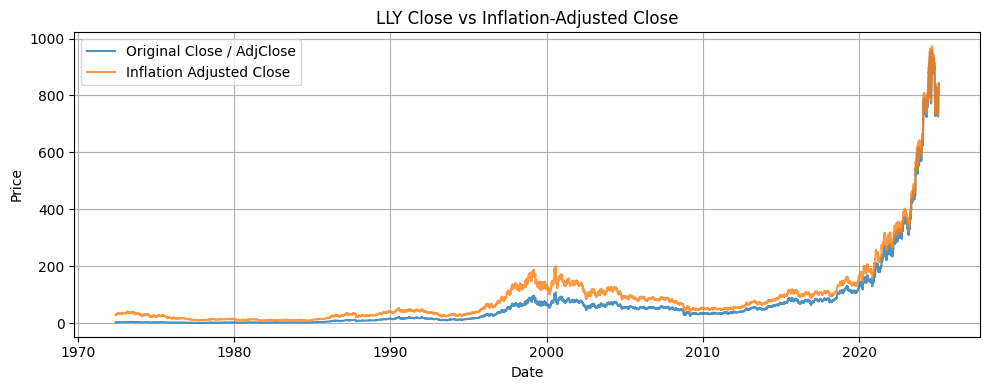

Summary for CTVA:
                 first_date                 last_date  num_rows  num_missing  \
0 2019-05-24 00:00:00+00:00 2025-02-05 00:00:00+00:00      1434            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


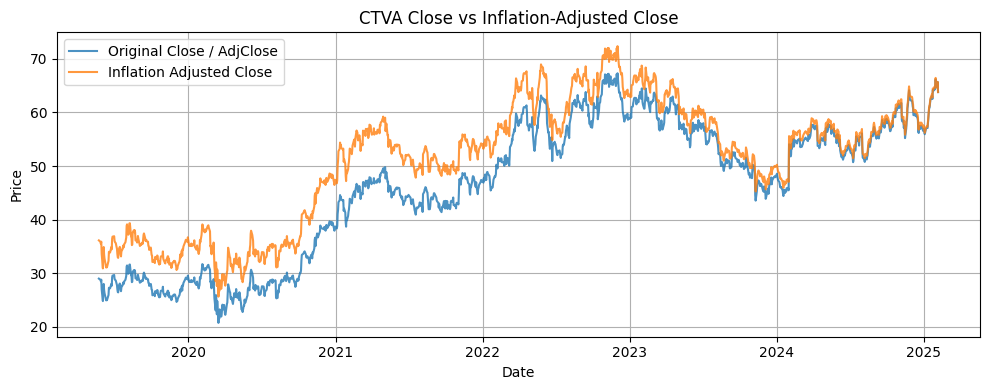

Summary for BA:
                 first_date                 last_date  num_rows  num_missing  \
0 1962-01-02 00:00:00+00:00 2025-02-05 00:00:00+00:00     15881            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


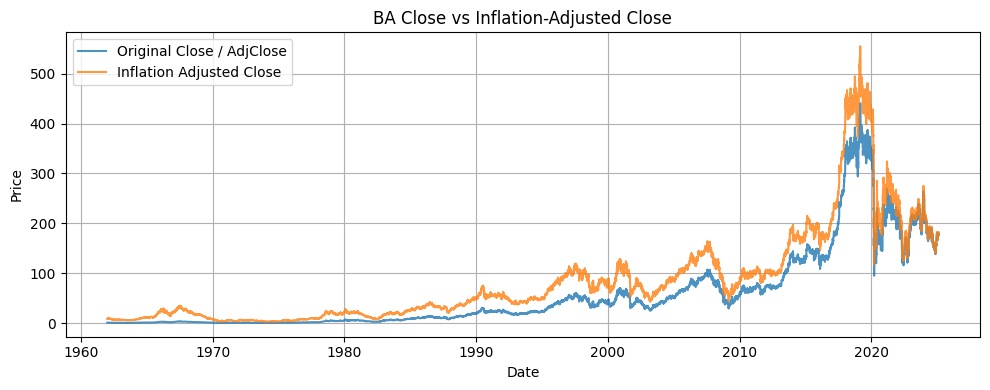

Summary for D:
                 first_date                 last_date  num_rows  num_missing  \
0 1980-03-17 00:00:00+00:00 2025-02-05 00:00:00+00:00     11316            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


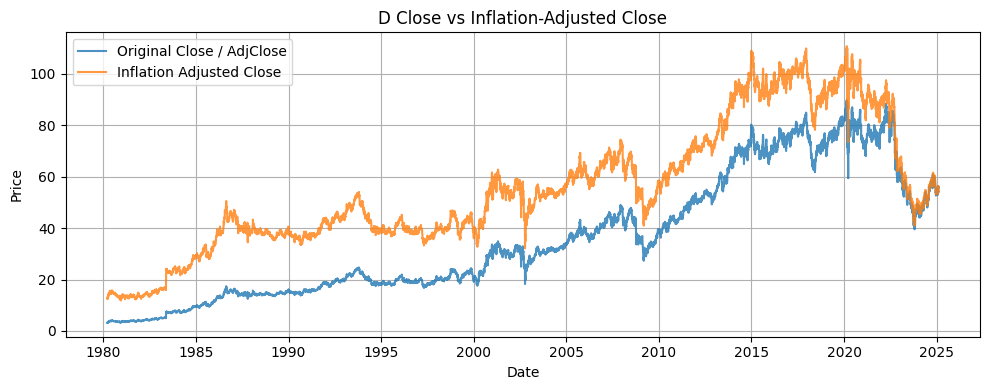

Summary for XOM:
                 first_date                 last_date  num_rows  num_missing  \
0 1962-01-02 00:00:00+00:00 2025-02-05 00:00:00+00:00     15881            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


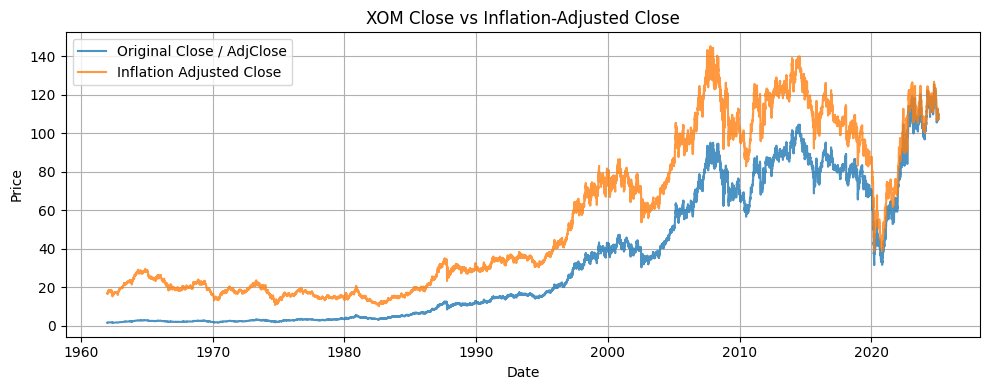

Summary for FCX:
                 first_date                 last_date  num_rows  num_missing  \
0 1995-07-10 00:00:00+00:00 2025-02-05 00:00:00+00:00      7445            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


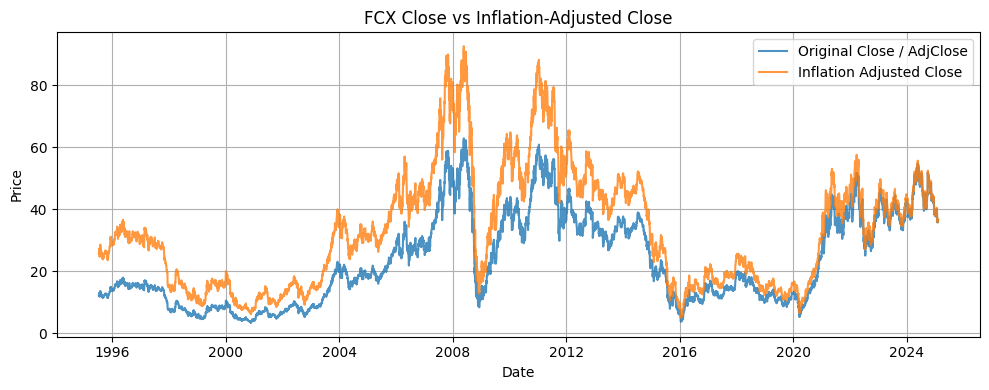

Summary for DUK:
                 first_date                 last_date  num_rows  num_missing  \
0 1980-03-17 00:00:00+00:00 2025-02-05 00:00:00+00:00     11316            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


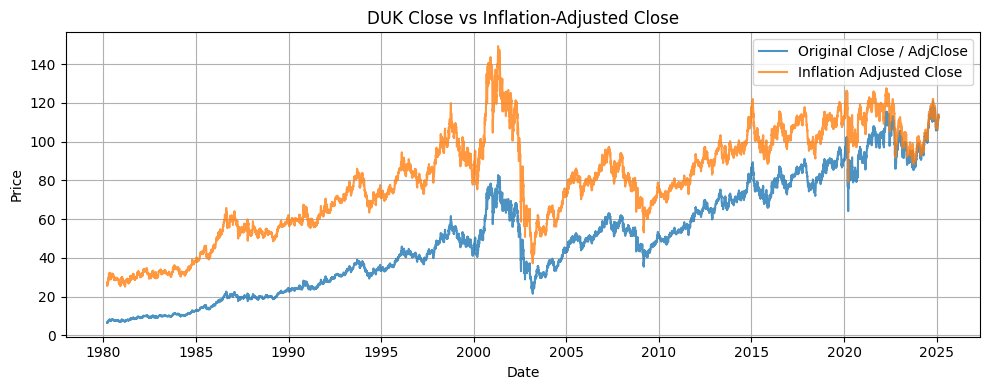

Summary for PSX:
                 first_date                 last_date  num_rows  num_missing  \
0 2012-04-12 00:00:00+00:00 2025-02-05 00:00:00+00:00      3224            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


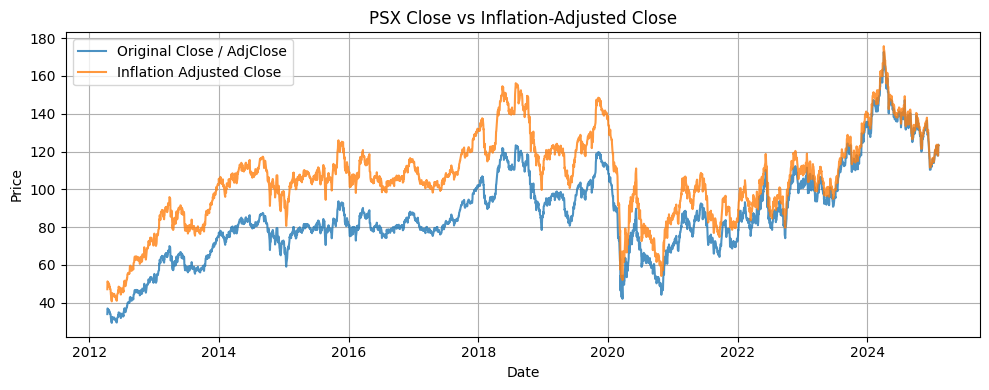

Summary for LMT:
                 first_date                 last_date  num_rows  num_missing  \
0 1977-01-03 00:00:00+00:00 2025-02-05 00:00:00+00:00     12125            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


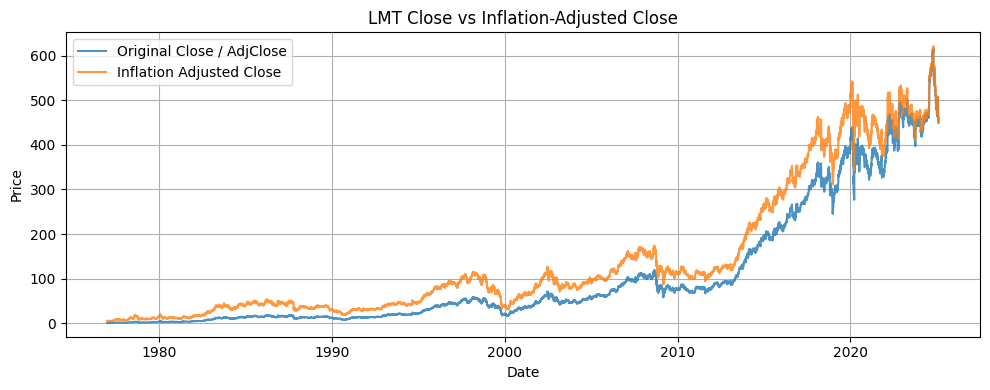

Summary for T:
                 first_date                 last_date  num_rows  num_missing  \
0 1983-11-21 00:00:00+00:00 2025-02-05 00:00:00+00:00     10384            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


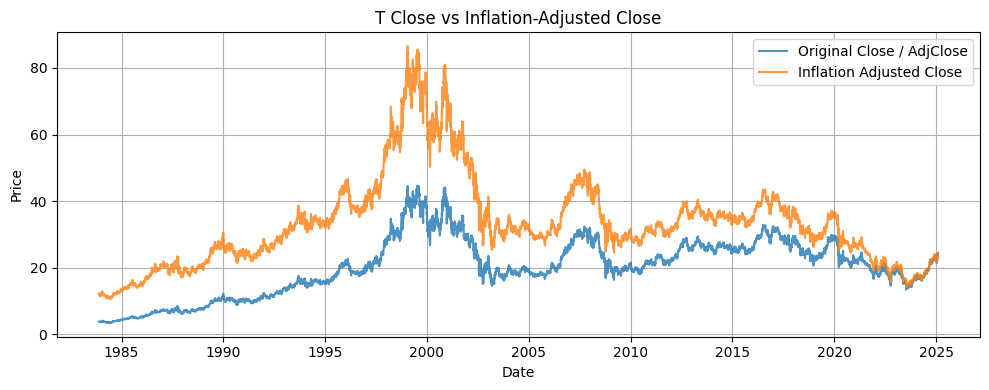

Summary for ETR:
                 first_date                 last_date  num_rows  num_missing  \
0 1972-06-01 00:00:00+00:00 2025-02-05 00:00:00+00:00     13282            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


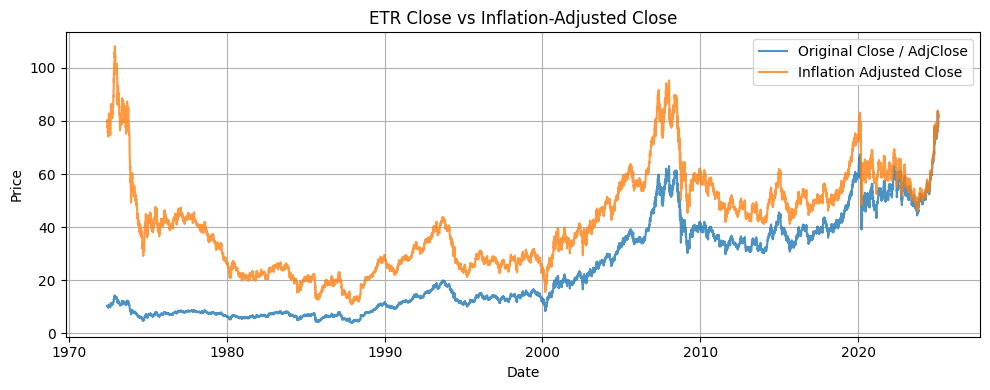

Summary for PEP:
                 first_date                 last_date  num_rows  num_missing  \
0 1972-06-01 00:00:00+00:00 2025-02-05 00:00:00+00:00     13282            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


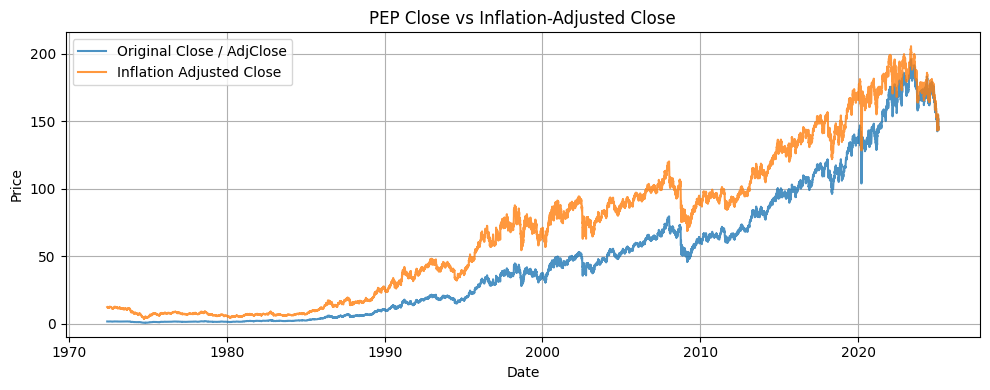

Summary for TSLA:
                 first_date                 last_date  num_rows  num_missing  \
0 2010-06-29 00:00:00+00:00 2025-02-04 00:00:00+00:00      3674            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


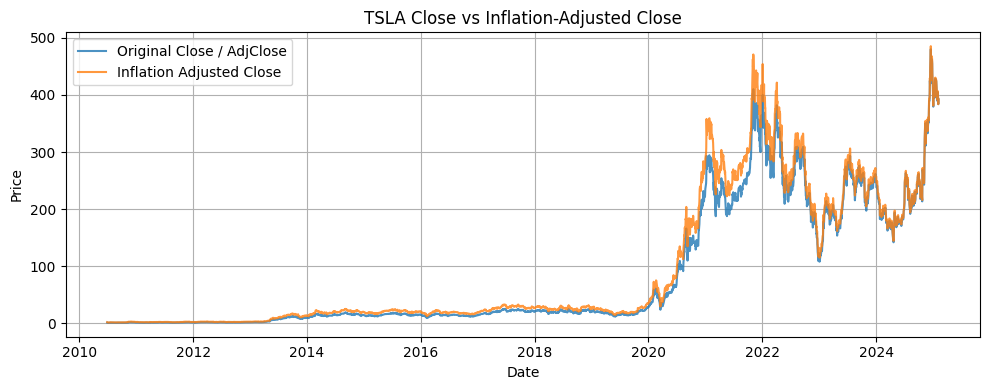

Summary for DHR:
                 first_date                 last_date  num_rows  num_missing  \
0 1978-12-29 00:00:00+00:00 2025-02-05 00:00:00+00:00     11622            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


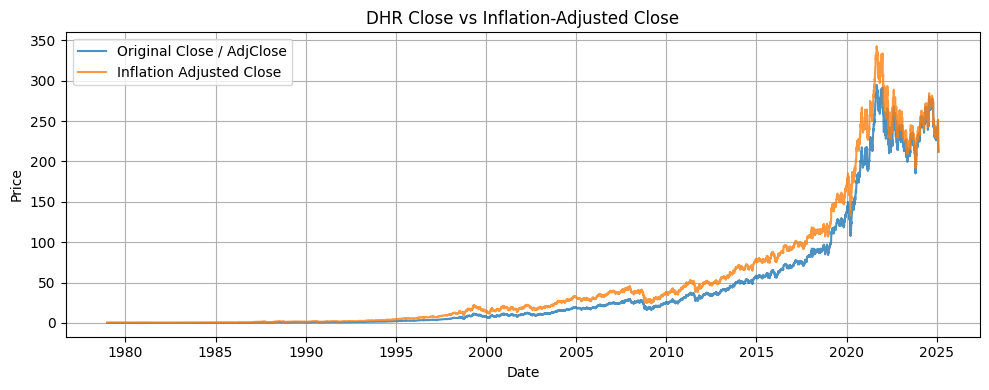

Summary for ORCL:
                 first_date                 last_date  num_rows  num_missing  \
0 1986-03-12 00:00:00+00:00 2025-02-05 00:00:00+00:00      9803            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


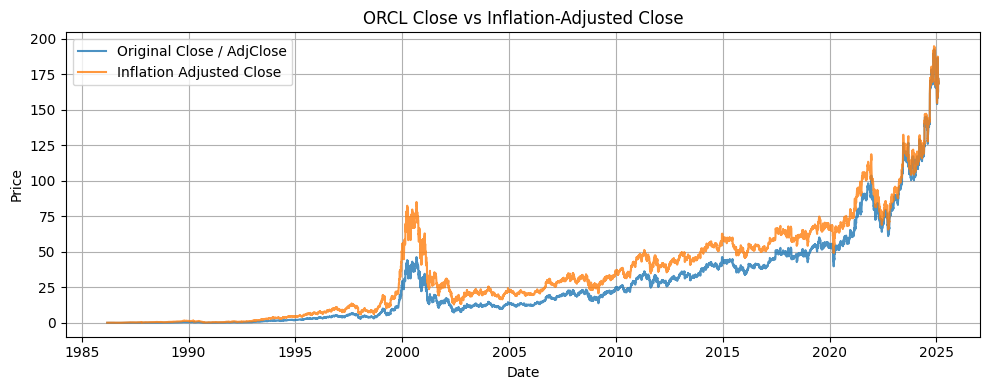

Summary for CBRE:
                 first_date                 last_date  num_rows  num_missing  \
0 2004-06-10 00:00:00+00:00 2025-02-05 00:00:00+00:00      5198            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


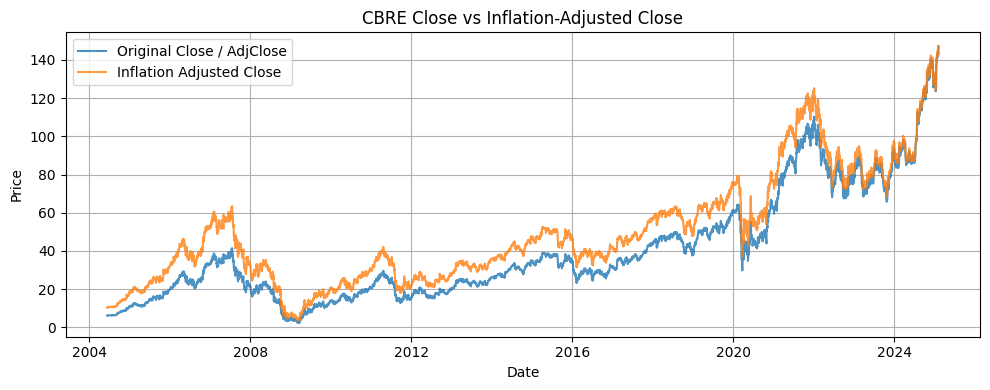

Summary for VTR:
                 first_date                 last_date  num_rows  num_missing  \
0 1997-05-05 00:00:00+00:00 2025-02-05 00:00:00+00:00      6984            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


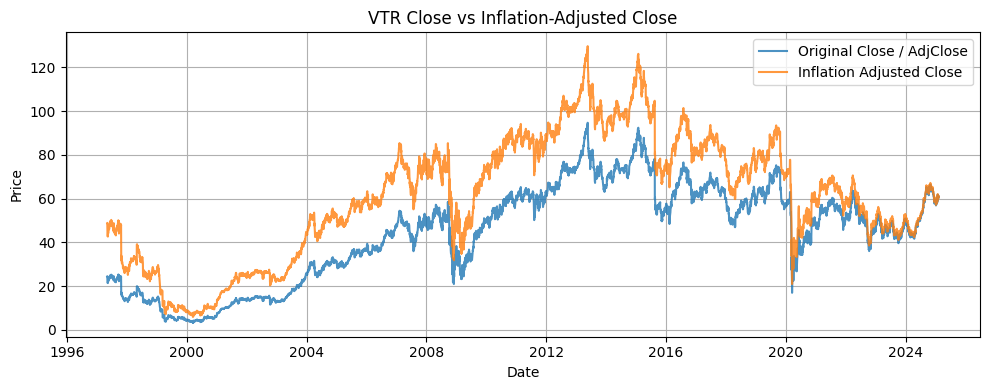

Summary for CVX:
                 first_date                 last_date  num_rows  num_missing  \
0 1962-01-02 00:00:00+00:00 2025-02-05 00:00:00+00:00     15881            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


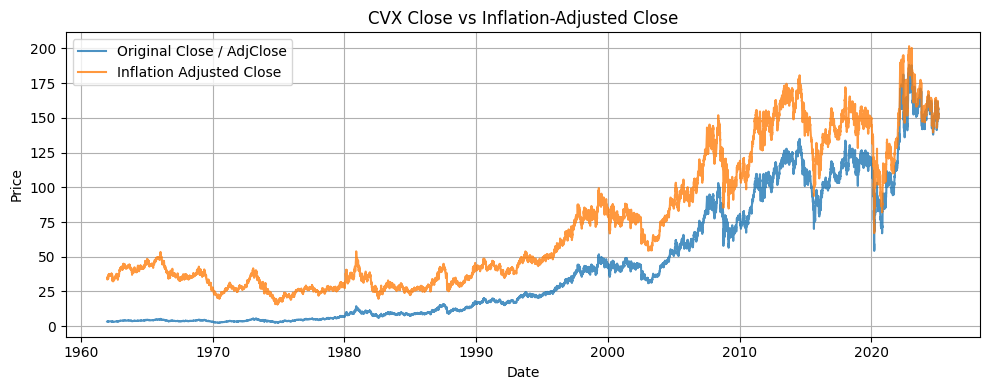

Summary for AVGO:
                 first_date                 last_date  num_rows  num_missing  \
0 2009-08-06 00:00:00+00:00 2025-02-05 00:00:00+00:00      3900            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


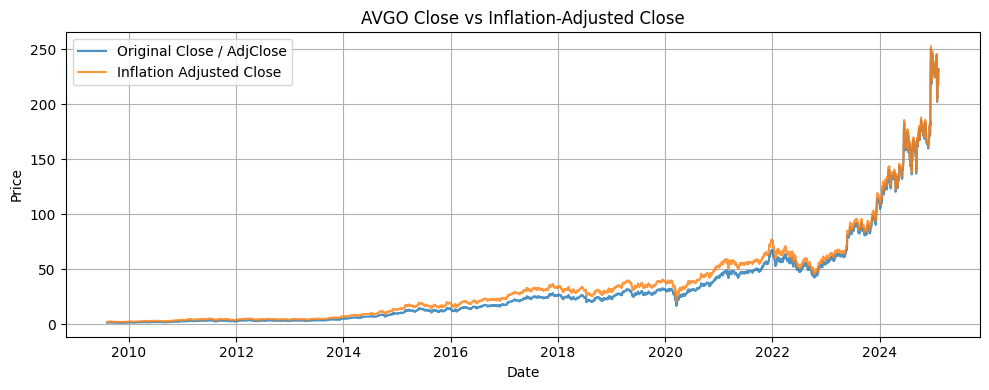

Summary for TMUS:
                 first_date                 last_date  num_rows  num_missing  \
0 2007-04-19 00:00:00+00:00 2025-02-05 00:00:00+00:00      4480            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


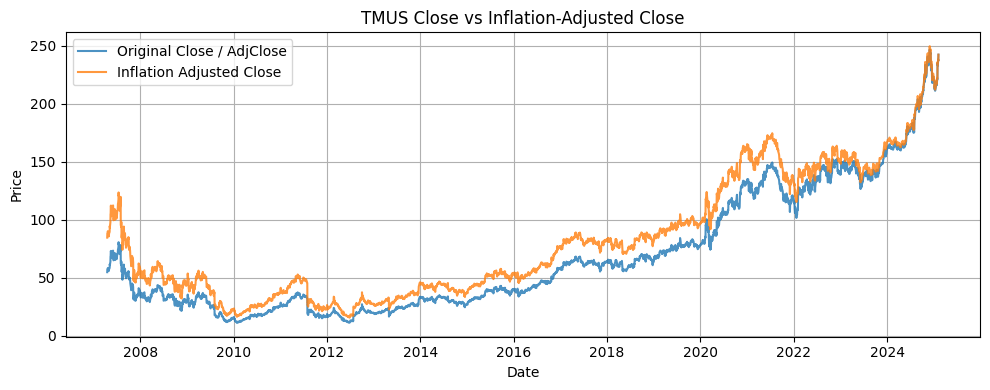

Summary for UNP:
                 first_date                 last_date  num_rows  num_missing  \
0 1980-01-02 00:00:00+00:00 2025-02-04 00:00:00+00:00     11367            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


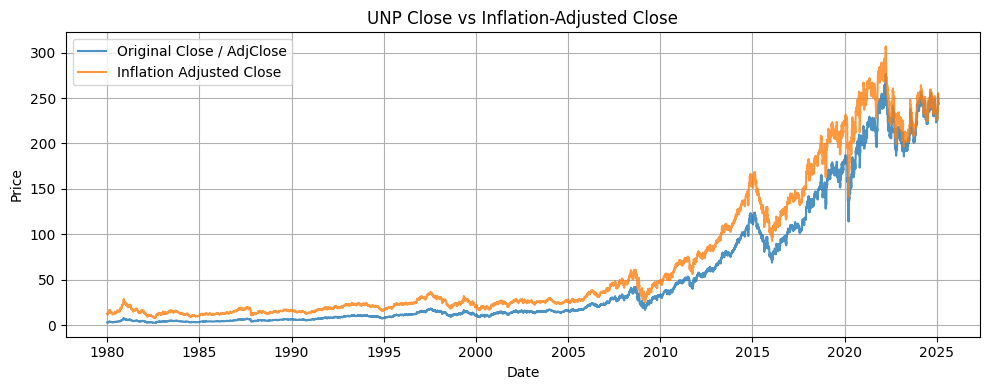

Summary for SO:
                 first_date                 last_date  num_rows  num_missing  \
0 1981-12-31 00:00:00+00:00 2025-02-05 00:00:00+00:00     10863            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


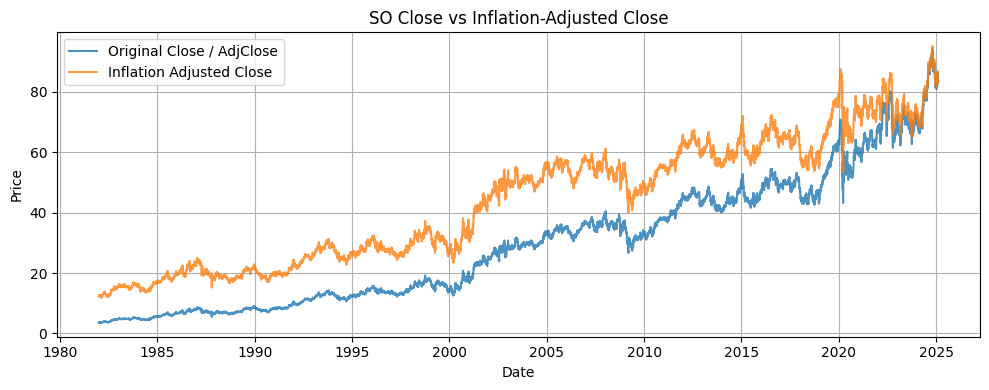

Summary for ABBV:
                 first_date                 last_date  num_rows  num_missing  \
0 2013-01-02 00:00:00+00:00 2025-02-05 00:00:00+00:00      3043            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


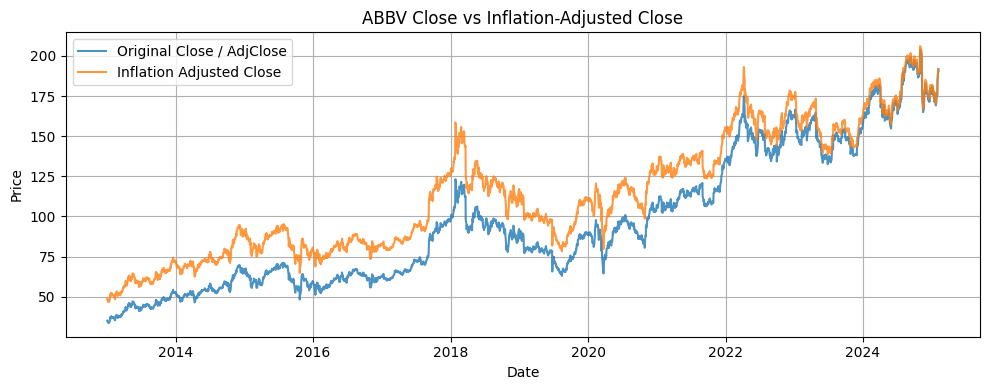

Summary for PG:
                 first_date                 last_date  num_rows  num_missing  \
0 1962-01-02 00:00:00+00:00 2025-02-05 00:00:00+00:00     15881            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


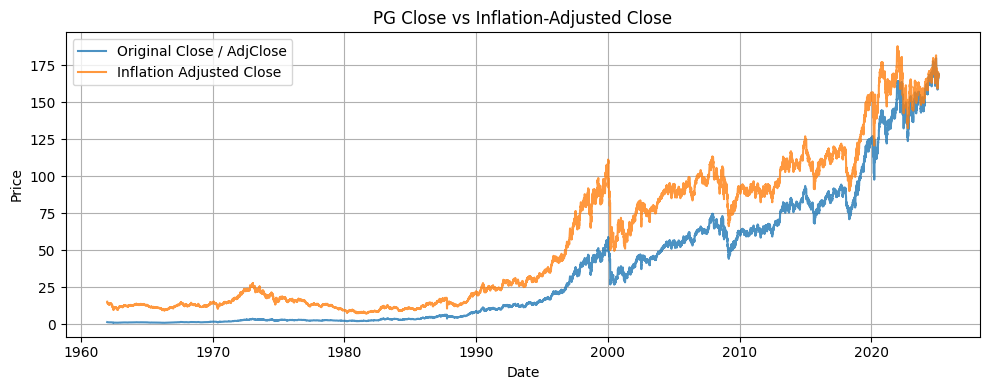

Summary for WMB:
                 first_date                 last_date  num_rows  num_missing  \
0 1981-12-31 00:00:00+00:00 2025-02-05 00:00:00+00:00     10863            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


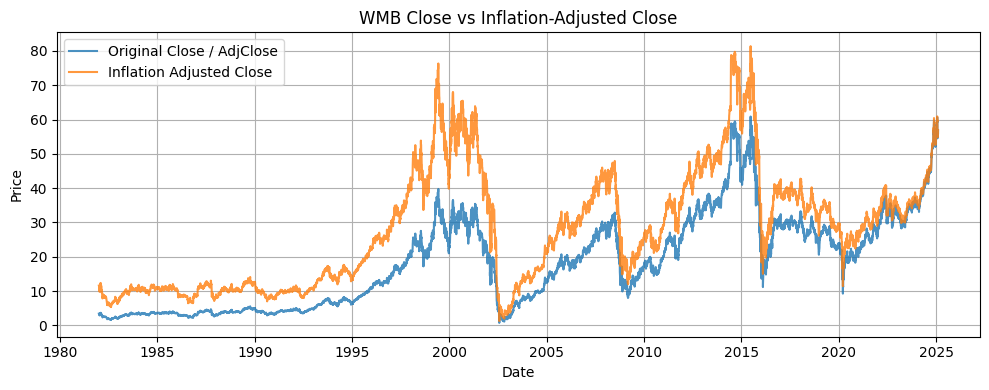

Summary for C:
                 first_date                 last_date  num_rows  num_missing  \
0 1977-01-03 00:00:00+00:00 2025-02-05 00:00:00+00:00     12125            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


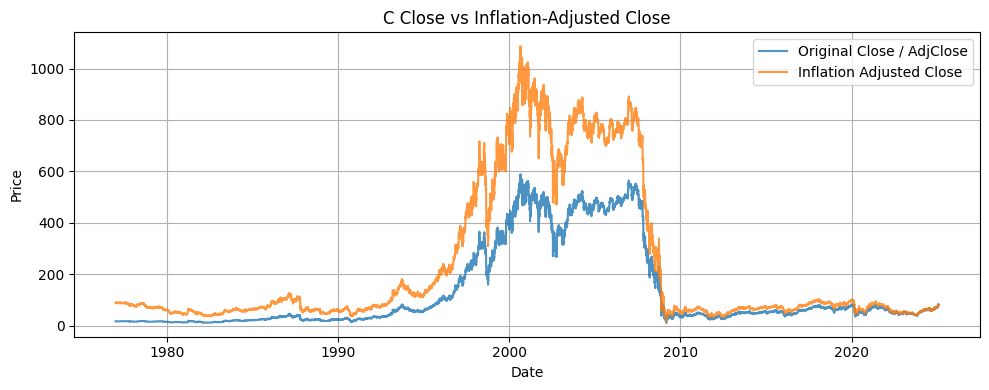

Summary for SHW:
                 first_date                 last_date  num_rows  num_missing  \
0 1980-03-17 00:00:00+00:00 2025-02-05 00:00:00+00:00     11316            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


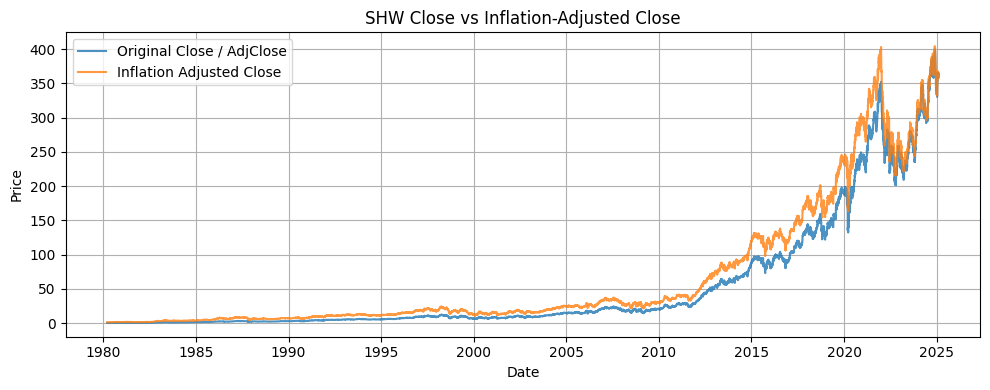

Summary for VMC:
                 first_date                 last_date  num_rows  num_missing  \
0 1973-02-21 00:00:00+00:00 2025-02-05 00:00:00+00:00     13102            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


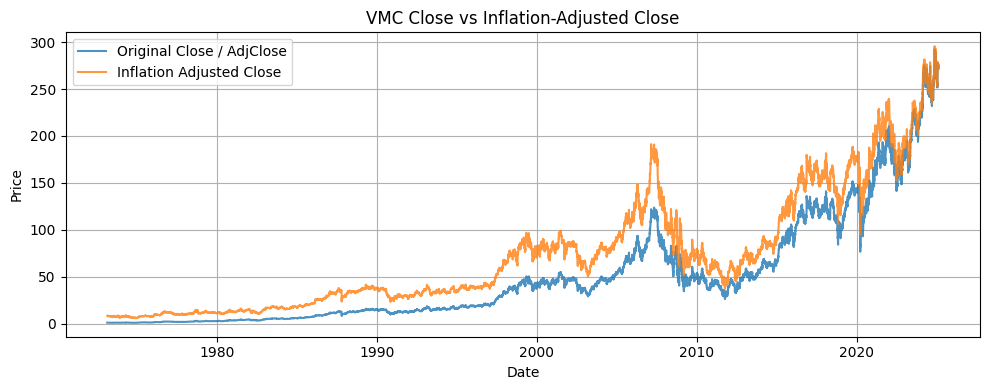

Summary for O:
                 first_date                 last_date  num_rows  num_missing  \
0 1994-10-18 00:00:00+00:00 2025-02-05 00:00:00+00:00      7627            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


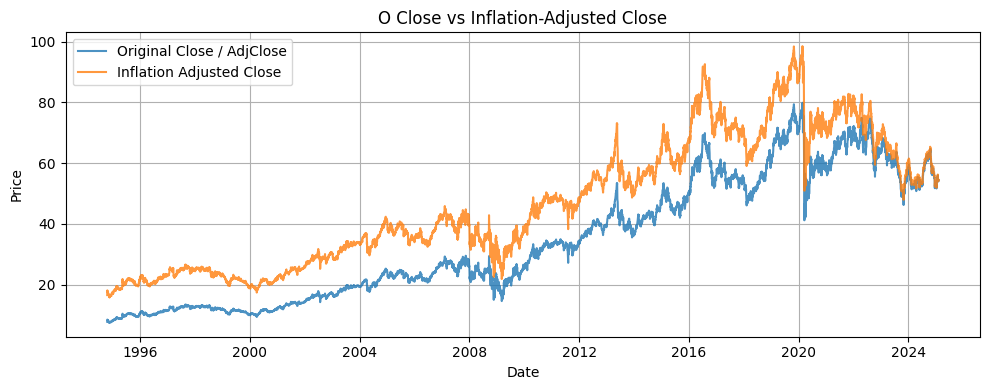

Summary for TJX:
                 first_date                 last_date  num_rows  num_missing  \
0 1987-06-26 00:00:00+00:00 2025-02-05 00:00:00+00:00      9476            0   

                                             columns  
0  adj_close, close, high, low, open, volume, Val...  


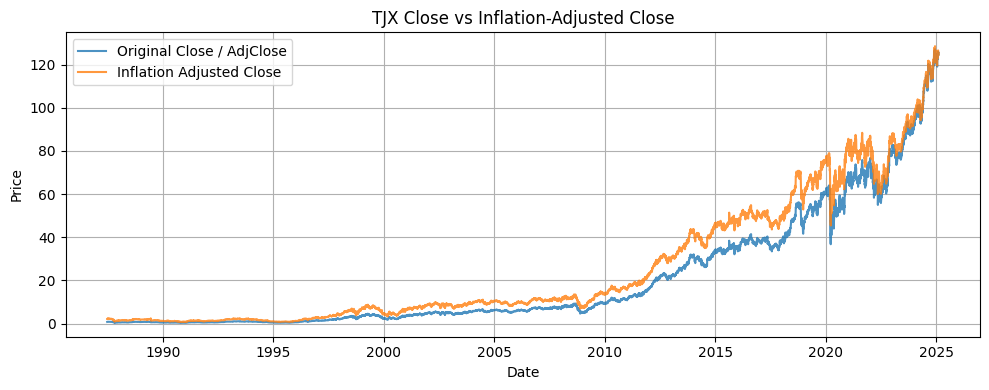

Saved 3 versions for EXC
Saved 3 versions for NFLX
Saved 3 versions for CMCSA
Saved 3 versions for JNJ
Saved 3 versions for VLO
Saved 3 versions for PDD
Saved 3 versions for UNH
Saved 3 versions for MU
Saved 3 versions for PLTR
Saved 3 versions for EQIX
Saved 3 versions for GS
Saved 3 versions for HON
Saved 3 versions for ECL
Saved 3 versions for AEP
Saved 3 versions for PLD
Saved 3 versions for BAC
Saved 3 versions for MSFT
Saved 3 versions for RTX
Saved 3 versions for ETN
Saved 3 versions for AXP
Saved 3 versions for ABT
Saved 3 versions for AAPL
Saved 3 versions for AMD
Saved 3 versions for DLR
Saved 3 versions for APD
Saved 3 versions for GOOG
Saved 3 versions for MS
Saved 3 versions for CSCO
Saved 3 versions for VST
Saved 3 versions for MPC
Saved 3 versions for MO
Saved 3 versions for GEV
Saved 3 versions for AMT
Saved 3 versions for MCD
Saved 3 versions for WMT
Saved 3 versions for PM
Saved 3 versions for VZ
Saved 3 versions for COP
Saved 3 versions for GILD
Saved 3 versions for 

In [4]:
# Cleaning pipeline

# -*- coding: utf-8 -*-
"""
Created on Thu Nov 20 17:48:05 2025

@author: Enrico
"""

import os
import re
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader.data import DataReader


def build_market_info():
    raw = [
        ("BITCOIN", "Digital Currencies"),
        ("GOLD", "Commodities"),
        ("SILVER", "Commodities"),
        ("OIL", "Commodities"),
        ("VIX", "Volatility Index"),
        ("FTSE100", "Equities"),
        ("DAX", "Equities"),
        ("CAC40", "Equities"),
        ("NIKKEI", "Equities"),
        ("SP500", "Equities"),
        ("NASDAQ", "Equities"),
        ("REIT_USA", "Real Estate Investment Trusts (REIT)"),
        ("REIT_EUROPE", "Real Estate Investment Trusts (REIT)"),
        ("REIT_ASIA", "Real Estate Investment Trusts (REIT)")
    ]
    df = pd.DataFrame(raw, columns=["symbol (acronym)", "market_group"])
    df["Currency"] = "USD"
    df.loc[df["symbol (acronym)"] == "DAX", "Currency"] = "EUR"
    df.loc[df["symbol (acronym)"] == "CAC40", "Currency"] = "EUR"
    return df

market_info = build_market_info()

def normalize_columns(df):
    """Normalize column names: lowercase, strip spaces, replace non-alphanum with underscores."""
    df = df.copy()
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(r'\s+', '_', regex=True)
                  .str.replace(r'[^\w]', '', regex=True)
    )
    return df

def _dedupe_ohlcv(df):
    """
    Remove duplicate dates in OHLCV data, keeping the last occurrence.
    Assumes 'date' column exists.
    """
    if 'date' not in df.columns:
        raise ValueError("DataFrame must have a 'date' column")
    df = df.sort_values('date')  # ensure chronological order
    df = df.drop_duplicates(subset='date', keep='last')
    df = df.set_index('date')
    return df


def get_exchange_rate(currency, start_date, end_date):
    """Get daily exchange rate to USD."""
    if currency.upper() == 'USD':
        df = pd.DataFrame({
            'Date': pd.date_range(start=start_date, end=end_date),
            'Rate_to_USD': 1.0
        })
        return df
    fx_map = {
        'EUR': ('EURUSD=X', 1),
        'GBP': ('GBPUSD=X', 1),
        'AUD': ('AUDUSD=X', 1),
        'NZD': ('NZDUSD=X', 1),
        'CAD': ('USDCAD=X', -1),
        'JPY': ('USDJPY=X', -1),
        'CHF': ('USDCHF=X', -1),
        'CNY': ('USDCNY=X', -1),
        'HKD': ('USDHKD=X', -1),
        'SEK': ('USDSEK=X', -1),
        'NOK': ('USDNOK=X', -1),
        'SGD': ('USDSGD=X', -1)
    }

    cur = currency.upper()
    if cur in fx_map:
        symbol, invert = fx_map[cur]
    else:
        symbol, invert = (f"{cur}USD=X", 1)  # fallback

    data = yf.download(symbol, start=start_date, end=end_date)[['Close']].reset_index()
    data = data.rename(columns={'Close': 'Rate_to_USD'})
    if invert == -1:
        data['Rate_to_USD'] = 1 / data['Rate_to_USD']
    return data[['Date','Rate_to_USD']]

def convert_to_usd(df, currency, exchange_rates):
    """
    Merge df with exchange rates and compute Value_USD.
    Ensures no MultiIndex issues.
    """
    df = df.copy()

    # Reset index if it's a MultiIndex
    if isinstance(df.index, pd.MultiIndex):
        df = df.reset_index()

    # Ensure 'Date' column exists for merge
    if 'Date' not in df.columns:
        df['Date'] = df.index

    df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
    exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date']).dt.tz_localize(None)

    merged = pd.merge(df, exchange_rates, on='Date', how='left')

    # Use 'close' if exists, otherwise fallback to first numeric column
    if 'close' in merged.columns:
        merged['Value_USD'] = merged['close'] * merged['Rate_to_USD']
    else:
        first_numeric = merged.select_dtypes(include='number').columns[0]
        merged['Value_USD'] = merged[first_numeric] * merged['Rate_to_USD']

    merged = merged.set_index('Date')
    return merged


def get_inflation_index(start_date, end_date):
    """Fetch daily interpolated US CPI from FRED."""
    try:
        cpi = DataReader('CPIAUCNS', 'fred', start_date - pd.DateOffset(days=31), end_date)
    except Exception as e:
        print("FRED CPI fetch failed:", e)
        return pd.DataFrame({'Date': pd.date_range(start=start_date, end=end_date), 'CPI_USD': np.nan})

    cpi = cpi.reset_index().rename(columns={'DATE':'Date','CPIAUCNS':'CPI_USD'})
    cpi['Date'] = pd.to_datetime(cpi['Date'])

    daily_index = pd.DataFrame({'Date': pd.date_range(start=start_date, end=end_date)})
    daily_index = pd.merge_asof(daily_index.sort_values('Date'),
                                cpi.sort_values('Date'),
                                on='Date',
                                direction='backward')
    daily_index['CPI_USD'] = daily_index['CPI_USD'].ffill().bfill().interpolate(method='linear')
    return daily_index

def adjust_for_inflation(df, inflation_index):
    df = df.copy()
    df['Date'] = df.index
    inflation_index['Date'] = pd.to_datetime(inflation_index['Date']).dt.tz_localize(None)
    merged = df.merge(inflation_index, on='Date', how='left')
    latest_cpi = inflation_index['CPI_USD'].iloc[-1]
    merged['real_close'] = merged['Value_USD'] * (latest_cpi / merged['CPI_USD'])
    merged = merged.set_index('Date')
    return merged

def euclidean_vector(a, b):
    a = np.array(a, dtype=float)
    b = np.array(b, dtype=float)
    if a.shape != b.shape:
        raise ValueError("Vectors must be same length")
    return float(np.sqrt(np.sum((a - b) ** 2)))

def chi_square_test(observed, expected):
    observed = np.array(observed, dtype=float)
    expected = np.array(expected, dtype=float)
    if observed.shape != expected.shape:
        raise ValueError("Length mismatch")
    if np.any(expected == 0):
        raise ValueError("Zero expected freq not allowed")
    chi_sq = np.sum((observed - expected) ** 2 / expected)
    return chi_sq

def process_asset_file(filepath, asset_name, market_info):
    """
    Process a single asset CSV file:
    - Clean columns and normalize names
    - Ensure date column exists
    - Deduplicate OHLCV data
    - Convert to USD if necessary
    - Adjust for inflation
    """
    # Load CSV
    df = pd.read_csv(filepath, on_bad_lines="skip", low_memory=False)

    # Normalize columns
    df = normalize_columns(df)

    # Find date-like column
    date_col = next((c for c in df.columns if "date" in c or "time" in c), None)
    if date_col is None:
        raise ValueError(f"No date-like column found in {filepath}")

    # Rename to 'date'
    if date_col != "date":
        df = df.rename(columns={date_col: "date"})

    # Convert date to datetime
    df['date'] = pd.to_datetime(df['date'], errors="coerce")
    df = df.dropna(subset=['date'])
    df = df.sort_values('date')

    # Deduplicate OHLCV
    df = _dedupe_ohlcv(df)

    # Skip if empty
    if df.empty:
        print(f"Skipping {asset_name}: no valid dates after cleaning")
        return pd.DataFrame()

    # Get currency
    row = market_info.loc[market_info['symbol (acronym)'] == asset_name]
    currency = row['Currency'].iloc[0] if len(row) else 'USD'

    # Convert to USD if needed
    if currency != "USD":
        fx = get_exchange_rate(currency, df.index.min(), df.index.max())
        df = convert_to_usd(df, currency, fx)
    else:
        df['Value_USD'] = df.get('close', np.nan)

    # Inflation adjustment
    inflation_index = get_inflation_index(df.index.min(), df.index.max())
    df = adjust_for_inflation(df, inflation_index)

    return df



def looks_like_returns_matrix(df):
    if not isinstance(df.index, pd.DatetimeIndex):
        try: df.index = pd.to_datetime(df.index)
        except: return False
    if not df.apply(lambda s: pd.api.types.is_numeric_dtype(s)).all():
        return False
    if not df.columns.str.contains(r"^\d").any():
        return False
    return True

def clean_edhec_returns(df, source):
    df = df.copy()
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df = df.apply(pd.to_numeric, errors="coerce")
    return df

def clean_names_and_dtypes(df, source, symbol_hint=None):
    df = normalize_columns(df)
    if "date" in df.columns:
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        df = df.dropna(subset=["date"])
    return df

def clean_any(df, source, symbol_hint=None):
    if looks_like_returns_matrix(df.rename(columns=str.lower)):
        return clean_edhec_returns(df, source)
    return clean_names_and_dtypes(df, source, symbol_hint)

def calendar_align(df):
    df = df.copy()

    # force datetime index
    df.index = pd.to_datetime(df.index, errors="coerce")
    df = df[~df.index.isna()]

    # localize/convert to UTC
    try:
        df.index = df.index.tz_localize("UTC")
    except TypeError:
        df.index = df.index.tz_convert("UTC")

    return df

def process_folder(path, market_info):
    results = {}
    for file in os.listdir(path):
        if not file.lower().endswith(".csv"): continue
        symbol = os.path.splitext(file)[0].upper()
        df = process_asset_file(os.path.join(path, file), symbol, market_info)
        df = calendar_align(df)
        results[symbol] = df
    return results

def summarize_data(df, symbol=None):
    summary = pd.DataFrame({
        "first_date": [df.index.min()],
        "last_date": [df.index.max()],
        "num_rows": [len(df)],
        "num_missing": [df.isna().sum().sum()],
        "columns": [", ".join(df.columns)]
    })
    if symbol:
        print(f"Summary for {symbol}:")
    print(summary)
    return summary

def plot_time_series(df, column="close", symbol=None):
    # Plot original vs real_close
    if "close" in df.columns and "real_close" in df.columns:
        plt.figure(figsize=(10, 4))
        plt.plot(df.index, df["close"], label="Original Close / AdjClose", alpha=0.8)
        plt.plot(df.index, df["real_close"], label="Inflation Adjusted Close", alpha=0.8)
        plt.title(f"{symbol} Close vs Inflation-Adjusted Close")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"{symbol}: missing 'close' or 'real_close', cannot plot comparison")

def process_folder_using_dictionary(path, market_info, dictionary_csv):

    # Read dictionary
    dict_df = pd.read_csv(dictionary_csv, header=None)

    # Extract all tickers (columns 1..end)
    all_symbols = set()

    for _, row in dict_df.iterrows():
        # skip the first entry (category)
        symbols = row.dropna().tolist()[1:]
        symbols = [str(s).strip().upper() for s in symbols]
        all_symbols.update(symbols)

    # Convert symbols → filenames
    allowed_files = {f"{symbol}.csv" for symbol in all_symbols}

    print("Allowed files:", allowed_files)

    results = {}

    for file in os.listdir(path):
        if file not in allowed_files:
            continue  # skip files not in dictionary

        symbol = os.path.splitext(file)[0].upper()
        full_path = os.path.join(path, file)

        print(f"Processing {symbol} ...")

        df = process_asset_file(full_path, symbol, market_info)
        if df.empty:
            print(f"Skipping {symbol}: empty after cleaning (not saving).")
            continue
        df = calendar_align(df)
        results[symbol] = df

    return results

folder_path = os.path.expanduser("~/csc1171/data/raw/SP500_ETF_FX_Crypto_Daily")

dictionary_path = os.path.expanduser("~/csc1171/notebooks/Dominik/company_dictionary.csv")


cleaned_data = process_folder_using_dictionary(
    folder_path,
    market_info,
    dictionary_path
)


for symbol, df in cleaned_data.items():
    print(symbol, df.head())

for symbol, df in cleaned_data.items():
    summarize_data(df, symbol)
    plot_time_series(df, "real_close", symbol)


output_folder = os.path.expanduser("~/csc1171/data/clean/SP500_ETF_FX_Crypto_Daily")

os.makedirs(output_folder, exist_ok=True)  # create folder if it doesn't exist

for symbol, df in cleaned_data.items():

    full_path = os.path.join(output_folder, f"{symbol}_cleaned_full.csv")
    df.to_csv(full_path)
    
    df_2008_2020 = df.loc[(df.index >= "2008-01-01") & (df.index <= "2020-12-31")]
    path_2008_2020 = os.path.join(output_folder, f"{symbol}_cleaned_2008_2020.csv")
    df_2008_2020.to_csv(path_2008_2020)

    df_2020_onward = df.loc[df.index >= "2020-01-01"]
    path_2020_onward = os.path.join(output_folder, f"{symbol}_cleaned_2020_onward.csv")
    df_2020_onward.to_csv(path_2020_onward)

    print(f"Saved 3 versions for {symbol}")


for symbol, df in cleaned_data.items():
    # Save each cleaned DataFrame as CSV
    output_path = os.path.join(output_folder, f"{symbol}_cleaned.csv")
    df.to_csv(output_path)
    print(f"Saved cleaned data for {symbol} to {output_path}")


In [60]:
# Simple Linear Regression: pure secular drift in real terms

freqs = [("W", "W-FRI"), ("M", "ME"), ("Y", "YE-DEC")]
agg   = "mean"   # or "last"  


def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

y_col = "real_close"
results = []

for path in files:
    df = load_clean_csv(path)
    if y_col not in df.columns:
        continue
    for freq_tag, freq_rule in freqs:
        dfi = df[[y_col]].dropna().resample(freq_rule).agg(agg)
        if dfi.shape[0] < 3 or dfi.empty:
            continue
    
        dfi["t"] = np.arange(len(dfi))  
        X = sm.add_constant(dfi["t"])
        y = dfi[y_col].astype(float)
    
        res = sm.OLS(y, X).fit()
        ticker = path.split("/")[-1].split("_cleaned")[0]
    
        results.append({
            "ticker": ticker,
            "freq": freq_tag,
            "beta_intercept": res.params.get("const", np.nan),
            "beta_slope": res.params.get("t", np.nan),
            "p_value_slope": res.pvalues.get("t", np.nan),
            "R2": res.rsquared,
            "Adj_R2": res.rsquared_adj,
            "AIC": res.aic,
            "BIC": res.bic,
            "n": int(res.nobs)
        })

pd.set_option("display.max_rows", None)

reg_table = pd.DataFrame(results)

# make freq an ordered categorical so sorting gives W -> M -> Y
freq_order = pd.api.types.CategoricalDtype(categories=["W", "M", "Y"], ordered=True)
reg_table["freq"] = reg_table["freq"].astype(freq_order)

# sort by ticker, then frequency (W, M, Y), and by p_value within each ticker
reg_table = reg_table.sort_values(["ticker", "freq", "p_value_slope"]).reset_index(drop=True)
reg_table


ticker freq  beta_intercept  beta_slope  p_value_slope            R2    Adj_R2          AIC          BIC    n
0     AAPL    W       -6.796089    0.132764  1.608917e-203  7.457920e-01  0.745416  5625.813080  5634.854322  679
1     AAPL    M       -6.479596    0.575775   4.371136e-48  7.490269e-01  0.747397  1291.801059  1297.900771  156
2     AAPL    Y       -3.087376    6.880552   4.211027e-05  7.952678e-01  0.776656   107.705631   108.835530   13
3     ABBV    W       61.676707    0.141781   9.883139e-90  6.212388e-01  0.620328  3357.270551  3365.341514  418
4     ABBV    M       61.932630    0.616644   5.375348e-22  6.297658e-01  0.625827   770.408295   775.536992   96
5     ABBV    Y       65.521994    7.342684   5.304443e-03  7.517800e-01  0.710410    63.003085    63.161968    8
6      ABT    W       19.485442    0.117258  5.289280e-232  7.905495e-01  0.790240  5286.080181  5295.121424  679
7      ABT    M       19.716526    0.509561   1.850978e-54  7.925015e-01  0.791154  1215.208992  1221.308704  156
8      ABT    Y       22.571794    6.107258   2.570327e-05  8.125428e-01  0.795501   103.180536   104.310435   13
9      AEP    W       39.627571    0.099771  1.179177e-293  8.622776e-01  0.862074  4723.124563  4732.165806  679
10     AEP    M       39.762281    0.434480   1.409937e-69  8.678926e-01  0.867035  1080.864783  1086.964495  156
11     AEP    Y       42.048812    5.230060   3.696297e-07  9.125506e-01  0.904601    87.727751    88.857650   13
12     AMD    W       -6.467438    0.068874   1.109770e-74  3.899125e-01  0.389011  5769.345270  5778.386512  679
13     AMD    M       -6.290991    0.298413   2.499791e-18  3.914467e-01  0.387495  1326.149831  1332.249543  156
14     AMD    Y       -4.525343    3.562933   1.614026e-02  4.226964e-01  0.370214   112.287621   113.417519   13
15     AMT    W       15.045312    0.351791  1.347156e-309  8.764285e-01  0.876246  6349.758396  6358.799638  679
16     AMT    M       15.699562    1.529135   2.256509e-72  8.784788e-01  0.877690  1458.535129  1464.634841  156
17     AMT    Y       24.109793   18.361493   1.157460e-06  8.925613e-01  0.882794   123.343521   124.473419   13
18    AMZN    W      -27.083127    0.219788  3.539854e-216  7.667541e-01  0.766410  6233.114660  6242.155902  679
19    AMZN    M      -26.623855    0.954533   9.238265e-51  7.682833e-01  0.766779  1433.105398  1439.205110  156
20    AMZN    Y      -21.243804   11.444004   4.404009e-05  7.936249e-01  0.774863   121.064364   122.194262   13
21     APD    W       62.252035    0.302874  4.640126e-237  7.976291e-01  0.797330  6545.344145  6554.385387  679
22     APD    M       62.809903    1.316629   7.392983e-56  8.009871e-01  0.799695  1503.209253  1509.308965  156
23     APD    Y       70.140054   15.793539   7.562078e-06  8.494290e-01  0.835741   124.458091   125.587990   13
24    AVGO    W       -4.596714    0.075355  7.391222e-321  9.154617e-01  0.915319  3329.753329  3338.533810  596
25    AVGO    M       -4.460199    0.327204   2.951931e-75  9.181859e-01  0.917580   763.059959   768.899921  137
26    AVGO    Y       -3.495691    3.736823   4.695148e-07  9.286419e-01  0.921506    68.635302    69.605115   12
27     AXP    W       45.080725    0.145044  3.040167e-212  7.604312e-01  0.760077  5692.479772  5701.521014  679
28     AXP    M       45.316699    0.631016   1.816949e-50  7.662429e-01  0.764725  1305.753800  1311.853512  156
29     AXP    Y       48.836276    7.564347   1.739418e-05  8.251880e-01  0.809296   107.635044   108.764942   13
30      BA    W       22.663268    0.514878  1.448378e-154  6.454166e-01  0.644893  7790.505961  7799.547204  679
31      BA    M       23.282520    2.245328   7.842739e-37  6.489376e-01  0.646658  1791.131594  1797.231306  156
32      BA    Y       34.989305   27.034311   4.545502e-04  6.878355e-01  0.659457   150.654671   151.784570   13
33     BAC    W       20.368772    0.015765   9.322957e-14  7.877099e-02  0.077410  5132.801866  5141.843108  679
34     BAC    

In [61]:
# MLR: drift net of same-day price levels/volume.

'''
How much did each stock’s price linearly trend upward or downward between 2008–2020?
'''

freqs = [("W", "W-FRI"), ("M", "ME"), ("Y", "YE-DEC")] 
agg_y = "mean"                                       
vol_agg = "sum"                                     


def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

y_col = "real_close"

candidate_predictors = ["volume"]


results = []

for path in files:
    df = load_clean_csv(path)
    if y_col not in df.columns:
        continue
    for freq_tag, freq_rule in freqs:
        # build X from whatever predictors exist in this file
        preds_use = [c for c in candidate_predictors if c in df.columns and c != y_col]
        
        if len(preds_use) < 1:
            continue
        
        # dfi = df[[y_col] + preds_use].dropna().copy()
        agg_map = {y_col: agg_y, **{c: (vol_agg if c.lower()=="volume" else "mean") for c in preds_use}}
        dfi = df[[y_col] + preds_use].dropna().resample(freq_rule).agg(agg_map)

        if dfi.empty or len(dfi) <= (len(preds_use) + 2):
            continue        
        # center predictors so the intercept is at mean period & mean volume
        dfi["t"] = np.arange(len(dfi))          # create per-period time (0,1,2,…)
        if "volume" in dfi.columns:
            dfi["volume"] = dfi["volume"] - dfi["volume"].mean()
        dfi["t"] = dfi["t"] - dfi["t"].mean()

        preds_use = preds_use + ["t"]
    

        X = sm.add_constant(dfi[preds_use].astype(float))
        y = dfi[y_col].astype(float)
        res = sm.OLS(y, X).fit()
        coef_tbl = pd.DataFrame({
            "term": res.params.index,
            "estimate": res.params.values,
            "std_error": res.bse.values,
            "t_value": res.tvalues.values,
            "p_value": res.pvalues.values
        })



        ticker = os.path.basename(path).split("_cleaned")[0]
    
        results.append({
            "ticker": ticker,
            "freq": freq_tag,
            "beta_intercept": res.params.get("const", np.nan),
            "beta_slope": res.params.get("t", np.nan),
            "p_value_slope": res.pvalues.get("t", np.nan),
            "R2": res.rsquared,
            "Adj_R2": res.rsquared_adj,
            "AIC": res.aic,
            "BIC": res.bic,
            "n": int(res.nobs)
        })

pd.set_option("display.max_rows", None)

reg_table = pd.DataFrame(results)
freq_order = pd.api.types.CategoricalDtype(categories=["W","M","Y"], ordered=True)
reg_table["freq"] = reg_table["freq"].astype(freq_order)
reg_table = reg_table.sort_values(["ticker","freq","p_value_slope"]).reset_index(drop=True)
reg_table




ticker freq  beta_intercept  beta_slope  p_value_slope        R2    Adj_R2          AIC          BIC    n
0     AAPL    W       38.210805    0.161282  7.794115e-163  0.770212  0.769532  5559.236129  5572.797992  679
1     AAPL    M       38.142951    0.740153   2.979892e-38  0.782037  0.779188  1271.801943  1280.951511  156
2     AAPL    Y       38.195937   10.593620   2.294911e-04  0.863273  0.835927   104.457360   106.152208   13
3     ABBV    W       91.238100    0.141935   1.447599e-90  0.627451  0.625655  3352.358213  3364.464658  418
4     ABBV    M       91.223229    0.617721   5.087944e-22  0.635528  0.627690   770.902532   778.595576   96
5     ABBV    Y       91.221388    7.370278   1.123645e-02  0.754071  0.655699    64.928914    65.167238    8
6      ABT    W       59.235758    0.120266  8.424725e-167  0.791113  0.790495  5286.250482  5299.812345  679
7      ABT    M       59.207514    0.531941   2.555145e-35  0.793591  0.790893  1216.387940  1225.537508  156
8      ABT    Y       59.215339    7.217760   2.600479e-03  0.821460  0.785752   104.546923   106.241771   13
9      AEP    W       73.449808    0.096887  6.860720e-281  0.869590  0.869204  4688.082780  4701.644643  679
10     AEP    M       73.434512    0.410705   1.014449e-63  0.880944  0.879387  1066.638059  1075.787627  156
11     AEP    Y       73.429171    4.531091   1.951124e-05  0.933045  0.919654    86.256263    87.951111   13
12     AMD    W       16.880827    0.060324   1.535095e-44  0.402270  0.400501  5757.450993  5771.012856  679
13     AMD    M       16.835979    0.245848   2.227231e-09  0.408786  0.401058  1323.640396  1332.789964  156
14     AMD    Y       16.852257    2.304686   2.622141e-01  0.462333  0.354799   113.362952   115.057800   13
15     AMT    W      134.302574    0.362381  7.804916e-269  0.878079  0.877718  6342.628277  6356.190140  679
16     AMT    M      134.207539    1.621230   1.494767e-58  0.882184  0.880644  1455.703964  1464.853532  156
17     AMT    Y      134.278750   25.234223   3.664474e-05  0.926611  0.911933   120.388577   122.083425   13
18    AMZN    W       47.425009    0.245876  1.914148e-235  0.806492  0.805919  6108.296222  6121.858085  679
19    AMZN    M       47.352452    1.150112   9.302835e-60  0.838051  0.835934  1379.221034  1388.370602  156
20    AMZN    Y       47.420222   15.714793   7.371290e-07  0.930021  0.916025   109.004889   110.699737   13
21     APD    W      164.926271    0.301195  8.269703e-221  0.797809  0.797211  6546.739216  6560.301079  679
22     APD    M      164.848676    1.310846   2.070535e-49  0.801048  0.798447  1505.161446  1514.311014  156
23     APD    Y      164.901290   20.982962   2.924176e-05  0.898800  0.878560   121.292699   122.987547   13
24    AVGO    W       17.821265    0.077327  1.976263e-323  0.921434  0.921169  3288.090287  3301.261009  596
25    AVGO    M       17.789656    0.343164   1.889542e-75  0.928173  0.927101   747.224598   755.984541  137
26    AVGO    Y       17.056837    4.329469   1.586471e-06  0.952914  0.942451    65.646376    67.101096   12
27     AXP    W       94.250699    0.118142  5.848238e-142  0.803275  0.802693  5560.693624  5574.255487  679
28     AXP    M       94.220411    0.477466   3.755908e-30  0.821393  0.819058  1265.775346  1274.924914  156
29     AXP    Y       94.222360    5.329274   5.459373e-03  0.871419  0.845702   105.642100   107.336948   13
30      BA    W      197.206982    0.556315  8.350819e-182  0.706240  0.705371  7664.730520  7678.292383  679
31      BA    M      197.295438    2.442464   2.126746e-43  0.713966  0.710227  1761.174383  1770.323951  156
32      BA    Y      197.195169   30.053511   2.404780e-04  0.755876  0.707051   149.458567   151.153415   13
33     BAC    W       25.713148   -0.000277   8.962052e-01  0.296277  0.294195  4951.930810  4965.492673  679
34     BAC    M       25.697826   -0.018866   3.267158e-01  0.353976  0.345532  1126.369203  1135.518771  156
35     BAC    Y       25.683374   -0.555226 

In [62]:
# logistic Regression (Sergei Did this so copy sergei code)

def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

def make_calendar_features(df):
    idx = df.index
    out = pd.DataFrame(index=idx)
    out["DayOfYear"]   = idx.dayofyear.astype(int)
    out["IsMonthStart"]= idx.is_month_start.astype(int)
    out["IsJanuary"]   = (idx.month == 1).astype(int)
    out["IsWeekend"]   = (idx.weekday >= 5).astype(int) 
    return out

def safe_pct_change(s):
    r = s.pct_change()
    return r.replace([np.inf, -np.inf], np.nan)

results = []

for path in files:
    df = load_clean_csv(path)
    if "real_close" not in df.columns:
        continue  # nothing to model
    for freq_tag, freq_rule in [("W","W-FRI"), ("M","ME"), ("Y","YE-DEC")]:
        # period-end return sign (W/M/Y)
        close_p = df["real_close"].resample(freq_rule).last()
        ret_p   = safe_pct_change(close_p)
        feats   = make_calendar_features(pd.DataFrame(index=ret_p.index))
        X_logit = feats[["DayOfYear", "IsMonthStart", "IsJanuary"]].copy()
        d = X_logit["DayOfYear"].astype(float)
        sd = d.std(ddof=0)
        X_logit["DayOfYear"] = (d - d.mean()) / (sd if sd > 0 else 1.0)
        y       = (ret_p > 0).astype(int)
    
        # align / drop NA
        dfi = pd.concat([X_logit, y.rename("Return_Positive")], axis=1).dropna()
        if dfi.empty or dfi["Return_Positive"].nunique() < 2:
            # need both classes to fit logit
            continue
    
        # X = sm.add_constant(dfi[["DayOfYear", "IsMonthStart", "IsJanuary"]])
        cols = [c for c in ["DayOfYear","IsMonthStart","IsJanuary"] if dfi[c].nunique() > 1]
        if not cols:
            continue
        X = sm.add_constant(dfi[cols], has_constant="add")

        yb = dfi["Return_Positive"]
    
        try:
            logit_model = sm.Logit(yb, X).fit(disp=False)
    
            params = logit_model.params
            pvals  = logit_model.pvalues
            phat = logit_model.predict(X)
            pred = (phat >= 0.5).astype(int)
            acc = (pred == yb).mean()
    
            ticker = os.path.basename(path).replace("_cleaned_2008_2020.csv", "")
    
            results.append({
                "ticker": ticker,
                "freq": freq_tag,
                "coef_const":        params.get("const", np.nan),
                "coef_DayOfYear":    params.get("DayOfYear", np.nan),
                "coef_IsMonthStart": params.get("IsMonthStart", np.nan),
                "coef_IsJanuary":    params.get("IsJanuary", np.nan),
                "p_const":           pvals.get("const", np.nan),
                "p_DayOfYear":       pvals.get("DayOfYear", np.nan),
                "p_IsMonthStart":    pvals.get("IsMonthStart", np.nan),
                "p_IsJanuary":       pvals.get("IsJanuary", np.nan),
                "pseudoR2_McFadden": logit_model.prsquared,
                "AIC": logit_model.aic,
                "BIC": logit_model.bic,
                "n": int(logit_model.nobs),
                "accuracy@0.5": float(acc)
            })

        except PerfectSeparationError:
            print(f"SKIP {os.path.basename(path)}: PerfectSeparationError")
            continue
        except Exception as e:
            print(f"SKIP {os.path.basename(path)}: {type(e).__name__}: {e}")
            continue


pd.set_option("display.max_rows", None)
logit_table = pd.DataFrame(results)
if logit_table.empty:
    print("No models were fitted (results is empty) — likely because all rows were skipped.")
else:
    logit_table = logit_table.sort_values("p_DayOfYear")
freq_order = pd.api.types.CategoricalDtype(["W","M","Y"], ordered=True)
logit_table["freq"] = logit_table["freq"].astype(freq_order)
logit_table = logit_table.sort_values(["ticker","freq","p_DayOfYear"]).reset_index(drop=True)
logit_table



/home/ug/orlovsd2/miniforge3/envs/sunpy/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ug/orlovsd2/miniforge3/envs/sunpy/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ug/orlovsd2/miniforge3/envs/sunpy/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/ug/orlovsd2/miniforge3/envs/sunpy/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.war

SKIP PLTR_cleaned_2008_2020.csv: LinAlgError: Singular matrix


/home/ug/orlovsd2/miniforge3/envs/sunpy/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ticker freq  coef_const  coef_DayOfYear  coef_IsMonthStart  coef_IsJanuary   p_const  p_DayOfYear  p_IsMonthStart  p_IsJanuary  pseudoR2_McFadden         AIC         BIC    n  accuracy@0.5
0     AAPL    W    0.362168       -0.100104          -0.031538       -0.280442  0.000018     0.264259        0.940623     0.374717           0.001518  929.000701  947.083185  679      0.583211
1     AAPL    M    0.436661       -0.161261                NaN       -0.537076  0.012189     0.388133             NaN     0.421140           0.004477  215.514342  224.663910  156      0.596154
2     AAPL    Y    1.205332       -0.071146                NaN             NaN  0.067416     0.912682             NaN          NaN           0.000848   18.033393   19.163291   13      0.769231
3     ABBV    W    0.188006       -0.009137          -0.350193       -0.797631  0.077060     0.935640        0.499834     0.051348           0.009482  580.829004  596.970930  418      0.562201
4     ABBV    M    0.455845        0.048840                NaN       -2.324675  0.039417     0.837696             NaN     0.046017           0.058308  129.394830  137.087875   96      0.635417
5     ABBV    Y    6.069192       11.712715                NaN             NaN  0.999948     0.999942             NaN          NaN           0.311278   11.638170   11.797053    8      0.750000
6      ABT    W    0.119128        0.042952          -0.082726       -0.148798  0.150954     0.626985        0.842879     0.634056           0.001033  946.518741  964.601226  679      0.522828
7      ABT    M    0.443666        0.214750                NaN       -0.574667  0.010662     0.255291             NaN     0.394479           0.018452  212.573348  221.722916  156      0.615385
8      ABT    Y    0.479871       -0.319914                NaN             NaN  0.406576     0.571426             NaN          NaN           0.018519   21.002432   22.132331   13      0.615385
9      AEP    W    0.193452        0.081497          -0.139757       -0.159301  0.020058     0.358457        0.737958     0.610546           0.002392  941.921667  960.004152  679      0.540501
10     AEP    M    0.324614       -0.000821                NaN       -0.171758  0.058405     0.996451             NaN     0.795498           0.000402  218.469484  227.619052  156      0.576923
11     AEP    Y    0.867297       -0.578198                NaN             NaN  0.171763     0.328375             NaN          NaN           0.060343   19.079889   20.209788   13      0.692308
12     AMD    W    0.052367        0.003055          -0.226389        0.065780  0.527243     0.972374        0.588501     0.833317           0.000364  948.525425  966.607910  679      0.515464
13     AMD    M    0.172878       -0.126858                NaN       -0.527287  0.310072     0.488574             NaN     0.425720           0.003542  220.856814  230.006382  156      0.532051
14     AMD    Y    0.154484       -0.102989                NaN             NaN  0.781548     0.852985             NaN          NaN           0.001914   21.910486   23.040385   13      0.538462
15     AMT    W    0.284054       -0.010149          -0.096937       -0.193383  0.000684     0.909257        0.816938     0.537267           0.000520  937.110935  955.193419  679      0.565538
16     AMT    M    0.399157       -0.111240                NaN       -0.728911  0.021142     0.549464             NaN     0.273532           0.005715  216.697169  225.846737  156      0.589744
17     AMT    Y    1.439613       -0.959742                NaN             NaN  0.070577     0.153728             NaN          NaN           0.158142   15.824155   16.954054   13      0.769231
18    AMZN    W    0.246292       -0.119270          -0.603915       -0.234302  0.003231     0.180280        0.153854     0.456577           0.003863  938.660717  956.743201  679      0.556701
19    AMZN    M    0.531869       -0.196702                NaN       -0.372378  0.002600     0.298450             NaN     0.585481           0.0

In [63]:
# Missing values see if there is any missing values still

def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

per_file_rows = []
per_file_missing = []     
per_file_anyrow = []      
key_cols = ["real_close", "close", "adj_close", "open", "high", "low", "volume", "Value_USD", "CPI_USD"]

for path in files:
    df = load_clean_csv(path)
    ticker = os.path.basename(path).replace("_cleaned_2008_2020.csv", "")

    n = len(df)
    per_file_rows.append({"ticker": ticker, "n_rows": n})

    cols_here = [c for c in key_cols if c in df.columns]
    miss_counts = df[cols_here].isna().sum().to_dict()

    for c in cols_here:
        n_miss = int(miss_counts[c])
        pct = (n_miss / n * 100.0) if n > 0 else np.nan
        per_file_missing.append({
            "ticker": ticker, "column": c,
            "n_missing": n_miss, "pct_missing": pct
        })

    any_na_count = int(df.isna().any(axis=1).sum())
    any_na_pct = (any_na_count / n * 100.0) if n > 0 else np.nan
    per_file_anyrow.append({
        "ticker": ticker,
        "rows_with_any_na": any_na_count,
        "pct_rows_with_any_na": any_na_pct
    })


rows_tbl   = pd.DataFrame(per_file_rows).sort_values("ticker").reset_index(drop=True)
missing_tbl= pd.DataFrame(per_file_missing).sort_values(["ticker","column"]).reset_index(drop=True)
anyrow_tbl = pd.DataFrame(per_file_anyrow).sort_values("ticker").reset_index(drop=True)

print("Rows per file")
print(rows_tbl.head(10))
print(f"... total files: {len(rows_tbl)}")

print("\n Missingness by file & column (first 20 rows)")
print(missing_tbl.head(20))

print("\n Rows containing ANY NaN per file (top 20)")
print(anyrow_tbl.head(20))

wide = (missing_tbl
        .pivot(index="ticker", columns="column", values="pct_missing")
        .fillna(0.0)
        .reset_index())

print("\n % missing by ticker (wide table, first 10) ")
print(wide.head(10))

#  Quick spotlight on the main target: real_close 
if "real_close" in missing_tbl["column"].unique():
    miss_real = (missing_tbl[missing_tbl["column"]=="real_close"]
                 .sort_values("pct_missing", ascending=False)
                 .reset_index(drop=True))
    print("\n Tickers with most missing in real_close")
    print(miss_real.head(20))


Rows per file
  ticker  n_rows
0   AAPL    3274
1   ABBV    2015
2    ABT    3274
3    AEP    3274
4    AMD    3274
5   AMGN       0
6    AMT    3274
7   AMZN    3274
8    APD    3274
9    APP       0
... total files: 94

 Missingness by file & column (first 20 rows)
   ticker      column  n_missing  pct_missing
0    AAPL     CPI_USD          0          0.0
1    AAPL   Value_USD          0          0.0
2    AAPL   adj_close          0          0.0
3    AAPL       close          0          0.0
4    AAPL        high          0          0.0
5    AAPL         low          0          0.0
6    AAPL        open          0          0.0
7    AAPL  real_close          0          0.0
8    AAPL      volume          0          0.0
9    ABBV     CPI_USD          0          0.0
10   ABBV   Value_USD          0          0.0
11   ABBV   adj_close          0          0.0
12   ABBV       close          0          0.0
13   ABBV        high          0          0.0
14   ABBV         low          0          

In [67]:
# Outlier detection (3 std deviation)

def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

def safe_pct_change(s):
    r = s.pct_change()
    return r.replace([np.inf, -np.inf], np.nan)

def flag_outliers_3sigma(series):
    """Return a DataFrame with mean, std, z, and boolean mask |z|>3."""
    s = pd.to_numeric(series, errors="coerce")
    mu = s.mean()
    sd = s.std(ddof=1)  # sample std
    z = (s - mu) / sd if sd not in (0, np.nan, None) and not np.isclose(sd, 0.0) else pd.Series(np.nan, index=s.index)
    mask = z.abs() > 3
    return mu, sd, z, mask

per_ticker_summary = []   
all_outlier_rows = []   

CHECK_VARS = ["Return", "real_close", "volume"]

for path in files:
    df = load_clean_csv(path)
    ticker = os.path.basename(path).replace("_cleaned_2008_2020.csv", "")
    if df.empty or "real_close" not in df.columns:
        continue
    # if "real_close" in df.columns:
    #     df["Return"] = safe_pct_change(df["real_close"])

    for freq_tag, freq_rule in freqs:
        dfr = df[["real_close", "volume"]].copy()
        dfr = dfr.resample(freq_rule).agg({"real_close": "last", "volume": "sum"})
        dfr["Return"] = safe_pct_change(dfr["real_close"])
        
        for var in CHECK_VARS:
            if var not in dfr.columns:
                continue
    
            mu, sd, z, mask = flag_outliers_3sigma(dfr[var])
    
            # per-ticker summary (counts & percents)
            n = dfr[var].dropna().shape[0]
            n_out = int(mask.sum()) if mask.notna().any() else 0
            pct_out = (n_out / n * 100.0) if n > 0 else np.nan
    
            per_ticker_summary.append({
                "ticker": ticker,
                "freq": freq_tag,
                "variable": var,
                "mean": float(mu) if pd.notna(mu) else np.nan,
                "std": float(sd) if pd.notna(sd) else np.nan,
                "n_obs": int(n),
                "n_outliers_3sigma": n_out,
                "pct_outliers_3sigma": pct_out
            })
    
            all_outlier_rows.append(
                dfr.loc[mask, list(dict.fromkeys([c for c in ["real_close","volume",var] if c in dfr.columns]))]
                   .assign(__variable=var, __zscore=z[mask], __ticker=ticker, __freq=freq_tag)
            )


# write summaries
summary_df = pd.DataFrame(per_ticker_summary).sort_values(["freq","variable", "ticker"]).reset_index(drop=True)
print("\n Outlier summary by ticker & freq & variable (top 30 rows)")
print(summary_df.head(30))


if all_outlier_rows:
    combined_outliers = pd.concat(all_outlier_rows).sort_index()
    print("\n Combined outliers (first 50 rows) ")
    print(combined_outliers.head(50))
    print(f"\nTotal outlier rows: {len(combined_outliers)}")
else:
    print("No outliers detected at ±3σ for the checked variables (or all series have near-zero std).")




 Outlier summary by ticker & freq & variable (top 30 rows)
   ticker freq variable      mean       std  n_obs  n_outliers_3sigma  pct_outliers_3sigma
0    AAPL    M   Return  0.023940  0.085997    155                  1             0.645161
1    ABBV    M   Return  0.012995  0.077740     95                  0             0.000000
2     ABT    M   Return  0.009139  0.053346    155                  2             1.290323
3     AEP    M   Return  0.004205  0.049955    155                  1             0.645161
4     AMD    M   Return  0.030132  0.177972    155                  0             0.000000
5     AMT    M   Return  0.011606  0.052429    155                  0             0.000000
6    AMZN    M   Return  0.027074  0.091344    155                  0             0.000000
7     APD    M   Return  0.008473  0.065383    155                  2             1.290323
8    AVGO    M   Return  0.025512  0.082065    136                  0             0.000000
9     AXP    M   Return  0.009

In [69]:
# Data Discretisation

target_var = ["Return", "real_close", "volume"]

bin_size = 50 # number of observations per bin 
pd.set_option("display.max_rows", 1000)   
pd.set_option("display.width", 200)
print_tickers = -1 
print_bins = -1 
rows_per_ticket = 20 
attach_column = True 

def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

def safe_pct_change(s):
    r = s.pct_change()
    return r.replace([np.inf, -np.inf], np.nan)

def discretise_by_fixed_bin_size(s, bin_size):
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return pd.DataFrame(), pd.Series(index=s.index, dtype="Int64")

    # sort values
    sorted_vals = s.sort_values()
    n = len(sorted_vals)
    n_bins = max(1, n // bin_size) 
    if n_bins == 1:
        v = sorted_vals.values
        row = {
            "bin_id": 0,
            "lower_bound": float(v[0]),
            "upper_bound": float(v[-1]),
            "bin_mean": float(np.mean(v)),
            "bin_median": float(np.median(v)),
            "count": int(len(v))
        }
        bin_table = pd.DataFrame([row])
        labels = pd.Series(0, index=s.index, dtype=int)
        return bin_table, labels

    edges = list(range(0, n, bin_size))
    if edges[-1] != n:
        edges.append(n)

    rows = []
    label_sorted = pd.Series(index=sorted_vals.index, dtype=int)

    for b in range(len(edges) - 1):
        i0, i1 = edges[b], edges[b+1]
        block = sorted_vals.iloc[i0:i1]
        v = block.values

        lower = float(v[0])
        upper = float(v[-1])
        mean  = float(np.mean(v))
        med   = float(np.median(v))

        rows.append({
            "bin_id": b,
            "lower_bound": lower,
            "upper_bound": upper,
            "bin_mean": mean,
            "bin_median": med,
            "count": int(len(v))
        })

        label_sorted.loc[block.index] = b

    bin_table = pd.DataFrame(rows)

    labels = label_sorted.reindex(s.index).astype(int)

    return bin_table, labels

preview_left = print_tickers
for path in files:
    df = load_clean_csv(path)
    ticker = os.path.basename(path).replace("_cleaned_2008_2020.csv", "")
    if df.empty:
        continue

    # derive Return for this discretisation step (matches earlier cells)
    if "real_close" in df.columns and "Return" not in df.columns:
        df["Return"] = safe_pct_change(df["real_close"])

    for freq_tag, freq_rule in freqs:
        # resample to W/M/Y
        dfr = df.resample(freq_rule).agg({"real_close": "mean", "volume": "sum"})
        dfr["Return"] = safe_pct_change(dfr["real_close"])

        for var in target_var:
            if var not in dfr.columns:
                continue
    
            bin_table, labels = discretise_by_fixed_bin_size(dfr[var], bin_size)
    
            if attach_column and not labels.empty:
                dfr[f"{var}_bin"] = labels.astype("Int64")
    
    
            if print_tickers == -1 or preview_left > 0:
                print(f"\n {ticker} & {freq_tag} & {var} & bin_size={bin_size} ")
                print("Bin Mean / Median / Boundaries:")
                if print_bins == -1:
                    print(bin_table)
                else:
                    print(bin_table.head(print_bins))
                print("\nDiscretised labels sample (date → bin_id):")
                print(dfr[[var, f"{var}_bin"]].dropna().head(rows_per_ticket))
                if print_tickers != -1:
                    preview_left -= 1



 AMZN & W & Return & bin_size=50 
Bin Mean / Median / Boundaries:
    bin_id  lower_bound  upper_bound  bin_mean  bin_median  count
0        0    -0.162018    -0.048448 -0.073849   -0.069091     50
1        1    -0.048374    -0.028927 -0.037409   -0.036870     50
2        2    -0.028849    -0.019041 -0.023827   -0.023577     50
3        3    -0.018607    -0.010100 -0.014118   -0.013784     50
4        4    -0.009988    -0.004347 -0.006874   -0.006580     50
5        5    -0.004311     0.000645 -0.001687   -0.001674     50
6        6     0.000749     0.006458  0.003794    0.003846     50
7        7     0.006927     0.011974  0.009514    0.009829     50
8        8     0.012087     0.018773  0.016030    0.016301     50
9        9     0.018789     0.024988  0.021821    0.022028     50
10      10     0.025148     0.033618  0.028596    0.028448     50
11      11     0.033777     0.047538  0.040011    0.040056     50
12      12     0.047785     0.069409  0.056213    0.054598     50
13      1

KeyError: "['Return_bin'] not in index"